#### Clear Ram

In [1]:
import gc
gc.collect()

3

#### Load Libraries

In [2]:
import mne
import numpy as np
import pandas 
import os
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import math
import pywt

from utils import *
from matplotlib.patches import Rectangle
from sklearn.decomposition import PCA

random.seed(444)


### Load & Process Data

#### Define Data Paths

In [3]:
main_path = '/home/dll-1/Desktop/eeg/datasets/Adil paper/'
main_path_wavelet = '/home/dll-1/Desktop/eeg/datasets/Adil paper/scallogramTest/gaus1/'

ab_edf_path = main_path + 'edf/Abnormal EDF Files/'
n_edf_path = main_path + 'edf/Normal EDF Files/'
ab_labels_path = main_path + 'csv/SW & SSW CSV Files/'
save_path = main_path + 'ml_data/numpy_arrays/'

In [4]:
class_label_names = ['normal', 'slowing', 'spike and wave']

#### Load Data from File

In [5]:
all_edf_data = np.concatenate((os.listdir(n_edf_path),os.listdir(ab_edf_path)), axis = 0)
print(len(all_edf_data))

1075


In [6]:
# Line position for train and test

train_pos = 0
valid_pos = 496773
test_pos = 603225

In [7]:
w = pywt.Wavelet('db2')

In [8]:
train_window_data = []
train_window_labels = []

test_window_data = []
test_window_labels = []

normal_count = 0
slowing_count = 0
spike_count = 0

for edf_name in tqdm(all_edf_data):
    file_num = int(edf_name[:-4])
    
    if edf_name in os.listdir(ab_edf_path):
        edf_path = ab_edf_path
    else:
        edf_path = n_edf_path
    
    raw = mne.io.read_raw_edf(edf_path+edf_name,preload = True,exclude = ['A1','A2'])     # Importing all EEG Channels, exculding A1 A2 since matlab has already refrenced the channels with A1 and A2
    raw.filter(l_freq=1,h_freq=45)      # Bandpass filtering [1-45] Hz
    epochs=mne.make_fixed_length_epochs(raw,duration=2,overlap=1)
    epochs_data=epochs.get_data()
    
    data = np.array(raw.get_data()[0:19])
    print('epochs_data shape = ',epochs_data.shape)
    
    # Epochs_data = np.concatenate((Epochs_data, epochs_data), axis=0)

    with open(main_path_wavelet + 'window_tracker.txt', 'r') as f:
        lines = f.readlines()
        for single_line in lines[train_pos+1:valid_pos]:
            single_line_list = single_line.split(' ')
            if edf_name == single_line_list[0]:
                
                data = epochs_data[int(single_line_list[2])][int(single_line_list[1])]
                pca = PCA(n_components = 2)
                decomp_levels = pywt.wavedec(data, wavelet=w,level = 4)
                feature_vector = []
                for k in range(len(decomp_levels)):
                    feature_vector.append(stat_features(decomp_levels[k]))
                feature_vector = np.array(feature_vector)
                pca.fit(feature_vector)
                pca_features = pca.fit_transform(feature_vector)
                train_window_data.append(np.array(pca_features.flatten()))

                train_window_labels.append(np.array(int(single_line_list[3])))
        
        for single_line in lines[valid_pos+1:test_pos]:
            single_line_list = single_line.split(' ')
            if edf_name == single_line_list[0]:
                
                data = epochs_data[int(single_line_list[2])][int(single_line_list[1])]
                pca = PCA(n_components = 2)
                decomp_levels = pywt.wavedec(data, wavelet=w,level = 4)
                feature_vector = []
                for k in range(len(decomp_levels)):
                    feature_vector.append(stat_features(decomp_levels[k]))
                feature_vector = np.array(feature_vector)
                pca.fit(feature_vector)
                pca_features = pca.fit_transform(feature_vector)
                train_window_data.append(np.array(pca_features.flatten()))

                train_window_labels.append(np.array(int(single_line_list[3])))
        
        for single_line in lines[test_pos+1:]:
            single_line_list = single_line.split(' ')
            if edf_name == single_line_list[0]:
                
                data = epochs_data[int(single_line_list[2])][int(single_line_list[1])]
                pca = PCA(n_components = 2)
                decomp_levels = pywt.wavedec(data, wavelet=w,level = 4)
                feature_vector = []
                for k in range(len(decomp_levels)):
                    feature_vector.append(stat_features(decomp_levels[k]))
                feature_vector = np.array(feature_vector)
                pca.fit(feature_vector)
                pca_features = pca.fit_transform(feature_vector)
                test_window_data.append(np.array(pca_features.flatten()))

                test_window_labels.append(np.array(int(single_line_list[3])))

    

  0%|          | 0/1075 [00:00<?, ?it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000757.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1799, 19, 400)


  0%|          | 1/1075 [00:00<12:50,  1.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001076.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361999  =      0.000 ...  1809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1809 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1809, 19, 400)


  0%|          | 2/1075 [00:01<10:46,  1.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000777.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 381599  =      0.000 ...  1907.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1907 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1907 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1907, 19, 400)


  0%|          | 3/1075 [00:01<10:04,  1.77it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000047.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121099  =      0.000 ...  1210.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1210 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1210 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1210, 19, 200)


  0%|          | 4/1075 [00:02<08:37,  2.07it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000411.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175199  =      0.000 ...   875.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
875 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 875 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (875, 19, 400)


  0%|          | 5/1075 [00:02<07:51,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000656.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240199  =      0.000 ...  1200.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1200 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1200, 19, 400)


  1%|          | 6/1075 [00:02<07:36,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000703.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


  1%|          | 7/1075 [00:03<07:28,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000116.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 181999  =      0.000 ...   909.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 909 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (909, 19, 400)


  1%|          | 8/1075 [00:03<07:34,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000244.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 103199  =      0.000 ...   515.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
515 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 515 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (515, 19, 400)


  1%|          | 9/1075 [00:04<06:52,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000944.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 400399  =      0.000 ...  2001.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2001 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 projection items activated
Using data from preloaded Raw for 2001 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2001, 19, 400)


  1%|          | 10/1075 [00:04<08:02,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001054.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 391199  =      0.000 ...  1955.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1955 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1955 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1955, 19, 400)


  1%|          | 11/1075 [00:05<08:28,  2.09it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001042.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364799  =      0.000 ...  1823.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1823 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1823, 19, 400)


  1%|          | 12/1075 [00:05<08:37,  2.05it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000284.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 174599  =      0.000 ...   872.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
872 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 872 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (872, 19, 400)


  1%|          | 13/1075 [00:06<08:00,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000204.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 61799  =      0.000 ...   308.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 308 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (308, 19, 400)


  1%|▏         | 14/1075 [00:06<07:04,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000973.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 378399  =      0.000 ...  1891.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1891 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1891 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1891, 19, 400)


  1%|▏         | 15/1075 [00:06<07:38,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000475.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 196799  =      0.000 ...   983.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 983 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (983, 19, 400)


  1%|▏         | 16/1075 [00:07<07:20,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000349.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163199  =      0.000 ...   815.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
815 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 815 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (815, 19, 400)


  2%|▏         | 17/1075 [00:07<06:58,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000264.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134199  =      0.000 ...   670.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
670 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 670 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (670, 19, 400)


  2%|▏         | 18/1075 [00:07<06:34,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000500.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 173799  =      0.000 ...   868.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
868 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 868 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (868, 19, 400)


  2%|▏         | 19/1075 [00:08<06:28,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000882.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362999  =      0.000 ...  1814.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1814 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1814 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1814, 19, 400)


  2%|▏         | 20/1075 [00:08<07:06,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000404.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130999  =      0.000 ...   654.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
654 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 654 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (654, 19, 400)


  2%|▏         | 21/1075 [00:09<06:45,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000645.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 251999  =      0.000 ...  1259.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1259 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1259 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1259, 19, 400)


  2%|▏         | 22/1075 [00:09<06:55,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000740.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361399  =      0.000 ...  1806.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1806 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1806 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1806, 19, 400)


  2%|▏         | 23/1075 [00:09<07:27,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000313.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192999  =      0.000 ...   964.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
964 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 964 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (964, 19, 400)


  2%|▏         | 24/1075 [00:10<07:12,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000995.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120199  =      0.000 ...   600.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 600 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (600, 19, 400)


  2%|▏         | 25/1075 [00:10<06:42,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000198.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158999  =      0.000 ...   794.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
794 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 794 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (794, 19, 400)


  2%|▏         | 26/1075 [00:11<06:41,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000422.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169199  =      0.000 ...   845.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
845 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 845 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (845, 19, 400)


  3%|▎         | 27/1075 [00:11<06:31,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000301.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77199  =      0.000 ...   385.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
385 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 385 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (385, 19, 400)


  3%|▎         | 28/1075 [00:11<06:05,  2.86it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000509.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 135199  =      0.000 ...   675.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
675 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 675 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (675, 19, 400)


  3%|▎         | 29/1075 [00:12<06:02,  2.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000193.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 108199  =      0.000 ...   540.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (540, 19, 400)


  3%|▎         | 30/1075 [00:12<05:50,  2.98it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000994.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


  3%|▎         | 31/1075 [00:12<06:34,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000728.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125399  =      0.000 ...   626.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
626 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 626 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (626, 19, 400)


  3%|▎         | 32/1075 [00:13<06:20,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000399.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 197199  =      0.000 ...   985.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
985 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 985 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (985, 19, 400)


  3%|▎         | 33/1075 [00:13<06:24,  2.71it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000513.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167599  =      0.000 ...   837.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
837 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 837 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (837, 19, 400)


  3%|▎         | 34/1075 [00:13<06:18,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000469.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 197999  =      0.000 ...   989.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
989 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 989 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (989, 19, 400)


  3%|▎         | 35/1075 [00:14<06:21,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000415.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152399  =      0.000 ...   761.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
761 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 761 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (761, 19, 400)


  3%|▎         | 36/1075 [00:14<06:10,  2.80it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000302.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169599  =      0.000 ...   847.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
847 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 847 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (847, 19, 400)


  3%|▎         | 37/1075 [00:14<06:07,  2.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000847.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361999  =      0.000 ...  1809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1809 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1809, 19, 400)


  4%|▎         | 38/1075 [00:15<06:49,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000381.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 196199  =      0.000 ...   980.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
980 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 980 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (980, 19, 400)


  4%|▎         | 39/1075 [00:15<06:50,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000799.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5399  =      0.000 ...    26.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 26 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
  4%|▎         | 40/1075 [00:16<05:48,  2.97it/s]

epochs_data shape =  (26, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000076.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160299  =      0.000 ...  1602.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1602 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1602 events 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
  4%|▍         | 41/1075 [00:16<06:00,  2.87it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000442.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 250999  =      0.000 ...  1254.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1254 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1254 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1254, 19, 400)


  4%|▍         | 42/1075 [00:16<06:23,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000120.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 196599  =      0.000 ...   982.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
982 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 982 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (982, 19, 400)


  4%|▍         | 43/1075 [00:17<06:21,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000234.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165199  =      0.000 ...   825.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
825 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 825 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (825, 19, 400)


  4%|▍         | 44/1075 [00:17<06:13,  2.76it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000451.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 214999  =      0.000 ...  1074.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1074 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1074 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1074, 19, 400)


  4%|▍         | 45/1075 [00:17<06:18,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000804.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


  4%|▍         | 46/1075 [00:18<06:55,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001049.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 384199  =      0.000 ...  1920.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1920 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1920 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1920, 19, 400)


  4%|▍         | 47/1075 [00:18<07:28,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000027.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192399  =      0.000 ...   961.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
961 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 961 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (961, 19, 400)


  4%|▍         | 48/1075 [00:19<07:03,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000646.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 325999  =      0.000 ...  1629.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1629 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1629 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1629, 19, 400)


  5%|▍         | 49/1075 [00:19<07:17,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000860.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364799  =      0.000 ...  1823.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1823 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1823, 19, 400)


  5%|▍         | 50/1075 [00:20<07:36,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000736.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 384199  =      0.000 ...  1920.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1920 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1920 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1920, 19, 400)


  5%|▍         | 51/1075 [00:20<07:58,  2.14it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000150.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175599  =      0.000 ...   877.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
877 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 877 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (877, 19, 400)


  5%|▍         | 52/1075 [00:21<07:38,  2.23it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000738.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


  5%|▍         | 53/1075 [00:21<07:54,  2.15it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000124.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 60599  =      0.000 ...   302.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
302 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 302 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (302, 19, 400)


  5%|▌         | 54/1075 [00:21<06:57,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000277.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 178199  =      0.000 ...   890.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
890 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 890 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (890, 19, 400)


  5%|▌         | 55/1075 [00:22<06:46,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000434.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


  5%|▌         | 56/1075 [00:22<06:36,  2.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000808.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


  5%|▌         | 57/1075 [00:23<07:06,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000304.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149999  =      0.000 ...   749.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
749 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 749 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (749, 19, 400)


  5%|▌         | 58/1075 [00:23<06:43,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000013.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 230599  =      0.000 ...  1152.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1152 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1152, 19, 400)


  5%|▌         | 59/1075 [00:23<06:44,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000022.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144799  =      0.000 ...   723.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
723 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 723 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (723, 19, 400)


  6%|▌         | 60/1075 [00:24<06:28,  2.62it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000323.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212199  =      0.000 ...  1060.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1060 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1060 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1060, 19, 400)


  6%|▌         | 61/1075 [00:24<06:29,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000285.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 263399  =      0.000 ...  1316.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1316 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1316 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1316, 19, 400)


  6%|▌         | 62/1075 [00:25<06:40,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000286.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134199  =      0.000 ...   670.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
670 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 670 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (670, 19, 400)


  6%|▌         | 63/1075 [00:25<06:20,  2.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000382.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 127199  =      0.000 ...   635.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
635 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 635 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (635, 19, 400)


  6%|▌         | 64/1075 [00:25<06:07,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001016.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 1801 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


  6%|▌         | 65/1075 [00:26<06:59,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000835.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


  6%|▌         | 66/1075 [00:26<07:01,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000978.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361399  =      0.000 ...  1806.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1806 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1806 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1806, 19, 400)


  6%|▌         | 67/1075 [00:27<07:25,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001035.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 382399  =      0.000 ...  1911.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1911 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1911, 19, 400)


  6%|▋         | 68/1075 [00:27<07:45,  2.16it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000308.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 62399  =      0.000 ...   311.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
311 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 311 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (311, 19, 400)


  6%|▋         | 69/1075 [00:27<06:50,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000236.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 196399  =      0.000 ...   981.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 981 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (981, 19, 400)


  7%|▋         | 70/1075 [00:28<06:40,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


  7%|▋         | 71/1075 [00:28<07:07,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000253.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 128999  =      0.000 ...   644.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
644 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 644 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (644, 19, 400)


  7%|▋         | 72/1075 [00:29<06:39,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000969.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 298399  =      0.000 ...  1491.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1491 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1491 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1491, 19, 400)


  7%|▋         | 73/1075 [00:29<06:52,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000486.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155999  =      0.000 ...   779.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
779 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 779 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (779, 19, 400)


  7%|▋         | 74/1075 [00:29<06:30,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000145.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 166799  =      0.000 ...   833.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
833 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 833 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (833, 19, 400)


  7%|▋         | 75/1075 [00:30<06:19,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000516.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 174199  =      0.000 ...   870.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
870 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 870 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (870, 19, 400)


  7%|▋         | 76/1075 [00:30<06:12,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000213.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163199  =      0.000 ...   815.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
815 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 815 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (815, 19, 400)


  7%|▋         | 77/1075 [00:31<06:05,  2.73it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000760.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 396999  =      0.000 ...  1984.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1984 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1984 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1984, 19, 400)


  7%|▋         | 78/1075 [00:31<06:56,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000840.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


  7%|▋         | 79/1075 [00:32<07:22,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000858.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 721999  =      0.000 ...  3609.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
3609 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3609 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


epochs_data shape =  (3609, 19, 400)


  7%|▋         | 80/1075 [00:32<09:05,  1.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000915.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


  8%|▊         | 81/1075 [00:33<08:27,  1.96it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000747.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 386799  =      0.000 ...  1933.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1933 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1933 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1933, 19, 400)


  8%|▊         | 82/1075 [00:33<08:32,  1.94it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000900.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360999  =      0.000 ...  1804.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1804 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1804, 19, 400)


  8%|▊         | 83/1075 [00:34<08:30,  1.94it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000207.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194199  =      0.000 ...   970.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 970 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (970, 19, 400)


  8%|▊         | 84/1075 [00:34<07:45,  2.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000929.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120199  =      0.000 ...   600.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 600 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (600, 19, 400)


  8%|▊         | 85/1075 [00:35<07:01,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000673.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


  8%|▊         | 86/1075 [00:35<07:22,  2.23it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000042.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 148499  =      0.000 ...  1484.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1484 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1484 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1484, 19, 200)


  8%|▊         | 87/1075 [00:35<07:02,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000428.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143399  =      0.000 ...   716.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
716 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 716 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (716, 19, 400)


  8%|▊         | 88/1075 [00:36<06:37,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000810.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364799  =      0.000 ...  1823.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1823 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1823, 19, 400)


  8%|▊         | 89/1075 [00:36<07:07,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000203.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 110399  =      0.000 ...   551.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
551 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 551 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (551, 19, 400)


  8%|▊         | 90/1075 [00:37<06:39,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001094.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


  8%|▊         | 91/1075 [00:37<07:05,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001092.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


  9%|▊         | 92/1075 [00:38<07:31,  2.17it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000167.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169199  =      0.000 ...   845.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
845 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 845 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (845, 19, 400)


  9%|▊         | 93/1075 [00:38<07:02,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001009.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


  9%|▊         | 94/1075 [00:38<07:27,  2.19it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000251.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


  9%|▉         | 95/1075 [00:39<07:04,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000377.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192799  =      0.000 ...   963.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
963 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 963 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (963, 19, 400)


  9%|▉         | 96/1075 [00:39<06:43,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000272.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170599  =      0.000 ...   852.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
852 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 852 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (852, 19, 400)


  9%|▉         | 97/1075 [00:40<06:28,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000135.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...   719.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (719, 19, 400)


  9%|▉         | 98/1075 [00:40<06:08,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000412.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216399  =      0.000 ...  1081.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1081 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1081 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1081, 19, 400)


  9%|▉         | 99/1075 [00:40<06:10,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000061.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158899  =      0.000 ...  1588.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1588 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1588 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1588, 19, 200)


  9%|▉         | 100/1075 [00:41<06:13,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000565.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 176799  =      0.000 ...   883.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
883 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 883 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (883, 19, 400)


  9%|▉         | 101/1075 [00:41<06:05,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001097.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 337599  =      0.000 ...  1687.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1687 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1687 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1687, 19, 400)


  9%|▉         | 102/1075 [00:42<06:43,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000990.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 401199  =      0.000 ...  2005.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2005 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2005 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2005, 19, 400)


 10%|▉         | 103/1075 [00:42<07:20,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000232.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172199  =      0.000 ...   860.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
860 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 860 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (860, 19, 400)


 10%|▉         | 104/1075 [00:42<06:55,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000648.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 247399  =      0.000 ...  1236.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1236 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1236 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1236, 19, 400)


 10%|▉         | 105/1075 [00:43<06:56,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000817.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...  1499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1499 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1499, 19, 400)


 10%|▉         | 106/1075 [00:43<07:05,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000343.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 187999  =      0.000 ...   939.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
939 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 939 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (939, 19, 400)


 10%|▉         | 107/1075 [00:44<06:50,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000483.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 323999  =      0.000 ...  1619.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1619 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1619 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1619, 19, 400)


 10%|█         | 108/1075 [00:44<07:06,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000452.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 98999  =      0.000 ...   494.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
494 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 494 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (494, 19, 400)


 10%|█         | 109/1075 [00:45<06:28,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000055.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 141799  =      0.000 ...   708.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
708 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 708 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (708, 19, 400)


 10%|█         | 110/1075 [00:45<06:09,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000694.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 10%|█         | 111/1075 [00:45<06:37,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000806.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339199  =      0.000 ...  1695.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1695 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1695 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1695, 19, 400)


 10%|█         | 112/1075 [00:46<07:01,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000296.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 249399  =      0.000 ...  1246.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1246 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1246 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1246, 19, 400)


 11%|█         | 113/1075 [00:46<06:52,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000466.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 59999  =      0.000 ...   299.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
299 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 299 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (299, 19, 400)


 11%|█         | 114/1075 [00:47<06:08,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000914.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120999  =      0.000 ...   604.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
604 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 604 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (604, 19, 400)


 11%|█         | 115/1075 [00:47<05:58,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001033.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 845599  =      0.000 ...  4227.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
4227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 4227 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


0 bad epochs dropped
epochs_data shape =  (4227, 19, 400)


 11%|█         | 116/1075 [00:48<08:13,  1.94it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000724.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 378199  =      0.000 ...  1890.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1890 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1890 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1890, 19, 400)


 11%|█         | 117/1075 [00:48<08:14,  1.94it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000201.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147599  =      0.000 ...   737.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
737 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 737 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (737, 19, 400)


 11%|█         | 118/1075 [00:49<07:26,  2.14it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000778.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360999  =      0.000 ...  1804.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1804 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1804, 19, 400)


 11%|█         | 119/1075 [00:49<07:37,  2.09it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000007.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 140399  =      0.000 ...   701.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
701 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 701 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (701, 19, 400)


 11%|█         | 120/1075 [00:49<06:56,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000427.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132999  =      0.000 ...   664.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
664 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 664 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (664, 19, 400)


 11%|█▏        | 121/1075 [00:50<06:24,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000227.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 141599  =      0.000 ...   707.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
707 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 707 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (707, 19, 400)


 11%|█▏        | 122/1075 [00:50<06:02,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000067.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133299  =      0.000 ...  1332.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1332 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1332 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1332, 19, 200)


 11%|█▏        | 123/1075 [00:50<05:56,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001027.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 12%|█▏        | 124/1075 [00:51<06:31,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000416.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169799  =      0.000 ...   848.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
848 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 848 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (848, 19, 400)


 12%|█▏        | 125/1075 [00:51<06:16,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000682.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


 12%|█▏        | 126/1075 [00:52<06:18,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000576.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216599  =      0.000 ...  1082.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1082 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1082 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1082, 19, 400)


 12%|█▏        | 127/1075 [00:52<06:15,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000763.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 393399  =      0.000 ...  1966.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1966 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1966 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1966, 19, 400)


 12%|█▏        | 128/1075 [00:53<06:51,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000028.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149399  =      0.000 ...   746.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
746 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 746 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (746, 19, 400)


 12%|█▏        | 129/1075 [00:53<06:24,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000024.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165199  =      0.000 ...   825.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
825 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 825 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (825, 19, 400)


 12%|█▏        | 130/1075 [00:53<06:04,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000316.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 150799  =      0.000 ...   753.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
753 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 753 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (753, 19, 400)


 12%|█▏        | 131/1075 [00:54<05:49,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000357.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 207199  =      0.000 ...  1035.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1035 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1035 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1035, 19, 400)


 12%|█▏        | 132/1075 [00:54<05:47,  2.71it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000975.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 31799  =      0.000 ...   158.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
158 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 158 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (158, 19, 400)


 12%|█▏        | 133/1075 [00:54<05:11,  3.02it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000073.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 207299  =      0.000 ...  2072.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
2072 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2072 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2072, 19, 200)


 12%|█▏        | 134/1075 [00:55<05:37,  2.79it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000920.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 376399  =      0.000 ...  1881.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1881 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1881 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1881, 19, 400)


 13%|█▎        | 135/1075 [00:55<06:16,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000802.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9999  =      0.000 ...    49.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 49 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (49, 19, 400)


 13%|█▎        | 136/1075 [00:55<05:25,  2.88it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000833.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 13%|█▎        | 137/1075 [00:56<06:01,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000290.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99999  =      0.000 ...   499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 499 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (499, 19, 400)


 13%|█▎        | 138/1075 [00:56<05:37,  2.77it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000226.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 151199  =      0.000 ...   755.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
755 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 755 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (755, 19, 400)


 13%|█▎        | 139/1075 [00:57<05:30,  2.83it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000063.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156099  =      0.000 ...  1560.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1560 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1560 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1560, 19, 200)


 13%|█▎        | 140/1075 [00:57<05:34,  2.80it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000035.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120099  =      0.000 ...  1200.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1200 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1200, 19, 200)


 13%|█▎        | 141/1075 [00:57<05:27,  2.85it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000853.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 363999  =      0.000 ...  1819.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1819 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1819 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1819, 19, 400)


 13%|█▎        | 142/1075 [00:58<06:09,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000196.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 82999  =      0.000 ...   414.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
414 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 414 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (414, 19, 400)


 13%|█▎        | 143/1075 [00:58<05:38,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000748.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 534799  =      0.000 ...  2673.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2673 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2673 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2673, 19, 400)


 13%|█▎        | 144/1075 [00:59<06:47,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000812.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 13%|█▎        | 145/1075 [00:59<06:58,  2.22it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000718.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240599  =      0.000 ...  1202.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1202 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1202 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1202, 19, 400)


 14%|█▎        | 146/1075 [01:00<06:46,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000385.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139799  =      0.000 ...   698.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
698 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 698 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (698, 19, 400)


 14%|█▎        | 147/1075 [01:00<06:13,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000104.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...  1499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1499 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1499, 19, 400)


 14%|█▍        | 148/1075 [01:00<06:25,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000023.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156999  =      0.000 ...   784.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
784 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 784 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (784, 19, 400)


 14%|█▍        | 149/1075 [01:01<06:00,  2.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000999.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361799  =      0.000 ...  1808.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1808 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1808 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1808, 19, 400)


 14%|█▍        | 150/1075 [01:01<06:29,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000798.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 386999  =      0.000 ...  1934.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1934 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1934 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1934, 19, 400)


 14%|█▍        | 151/1075 [01:02<06:53,  2.23it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001096.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 419999  =      0.000 ...  2099.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2099 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2099 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2099, 19, 400)


 14%|█▍        | 152/1075 [01:02<07:12,  2.14it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366399  =      0.000 ...  1831.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1831 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1831 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1831, 19, 400)


 14%|█▍        | 153/1075 [01:03<07:16,  2.11it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000825.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 462799  =      0.000 ...  2313.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
2313 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2313 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2313, 19, 400)


 14%|█▍        | 154/1075 [01:03<07:37,  2.01it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000168.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147799  =      0.000 ...   738.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
738 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 738 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (738, 19, 400)


 14%|█▍        | 155/1075 [01:03<06:51,  2.23it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000229.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164599  =      0.000 ...   822.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 822 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (822, 19, 400)


 15%|█▍        | 156/1075 [01:04<06:22,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000488.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 254199  =      0.000 ...  1270.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1270 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1270 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1270, 19, 400)


 15%|█▍        | 157/1075 [01:04<06:26,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000889.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 367199  =      0.000 ...  1835.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1835 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1835 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1835, 19, 400)


 15%|█▍        | 158/1075 [01:05<06:43,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000108.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 15%|█▍        | 159/1075 [01:05<06:18,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000435.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 272999  =      0.000 ...  1364.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1364 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1364 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1364, 19, 400)


 15%|█▍        | 160/1075 [01:06<06:21,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000826.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 374199  =      0.000 ...  1870.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1870 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1870 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1870, 19, 400)


 15%|█▍        | 161/1075 [01:06<06:40,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000342.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 136999  =      0.000 ...   684.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
684 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 684 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (684, 19, 400)


 15%|█▌        | 162/1075 [01:06<06:08,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000378.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 195399  =      0.000 ...   976.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
976 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 976 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (976, 19, 400)


 15%|█▌        | 163/1075 [01:07<05:57,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000283.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 15%|█▌        | 164/1075 [01:07<05:45,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001059.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 402599  =      0.000 ...  2012.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2012 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2012 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2012, 19, 400)


 15%|█▌        | 165/1075 [01:08<06:20,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000221.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163199  =      0.000 ...   815.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
815 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 815 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (815, 19, 400)


 15%|█▌        | 166/1075 [01:08<05:59,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000823.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 280399  =      0.000 ...  1401.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1401 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1401 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1401, 19, 400)


 16%|█▌        | 167/1075 [01:08<06:09,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000374.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 136799  =      0.000 ...   683.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
683 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 683 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (683, 19, 400)


 16%|█▌        | 168/1075 [01:09<05:47,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000098.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180499  =      0.000 ...  1804.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1804 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1804, 19, 200)


 16%|█▌        | 169/1075 [01:09<05:48,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000971.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 16%|█▌        | 170/1075 [01:10<06:15,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000476.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 263599  =      0.000 ...  1317.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1317 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1317 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1317, 19, 400)


 16%|█▌        | 171/1075 [01:10<06:16,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000155.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182399  =      0.000 ...   911.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 911 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (911, 19, 400)


 16%|█▌        | 172/1075 [01:10<06:07,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000824.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 392599  =      0.000 ...  1962.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1962 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1962 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1962, 19, 400)


 16%|█▌        | 173/1075 [01:11<06:32,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000485.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 258399  =      0.000 ...  1291.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1291 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1291 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1291, 19, 400)


 16%|█▌        | 174/1075 [01:11<06:21,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000880.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 151799  =      0.000 ...   758.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
758 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 758 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (758, 19, 400)


 16%|█▋        | 175/1075 [01:12<05:58,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000041.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 151799  =      0.000 ...  1517.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1517 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1517 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1517, 19, 200)


 16%|█▋        | 176/1075 [01:12<05:49,  2.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000781.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 16%|█▋        | 177/1075 [01:12<06:15,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000631.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180799  =      0.000 ...   903.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 903 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (903, 19, 400)


 17%|█▋        | 178/1075 [01:13<05:59,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001079.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 17%|█▋        | 179/1075 [01:13<06:19,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000461.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 177799  =      0.000 ...   888.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
888 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 888 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (888, 19, 400)


 17%|█▋        | 180/1075 [01:14<06:01,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001067.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 17%|█▋        | 181/1075 [01:14<06:24,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000482.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 290999  =      0.000 ...  1454.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1454 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1454 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1454, 19, 400)


 17%|█▋        | 182/1075 [01:15<06:23,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000991.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 17%|█▋        | 183/1075 [01:15<06:37,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000481.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 67399  =      0.000 ...   336.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
336 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 336 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (336, 19, 400)


 17%|█▋        | 184/1075 [01:15<05:50,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000657.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 243399  =      0.000 ...  1216.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1216 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1216 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1216, 19, 400)


 17%|█▋        | 185/1075 [01:16<05:50,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000263.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144599  =      0.000 ...   722.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
722 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 722 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (722, 19, 400)


 17%|█▋        | 186/1075 [01:16<05:36,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000185.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 17%|█▋        | 187/1075 [01:16<05:32,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000148.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180399  =      0.000 ...   901.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
901 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 901 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (901, 19, 400)


 17%|█▋        | 188/1075 [01:17<05:28,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000691.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 253199  =      0.000 ...  1265.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1265 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1265 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1265, 19, 400)


 18%|█▊        | 189/1075 [01:17<05:37,  2.62it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000298.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 61399  =      0.000 ...   306.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
306 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 306 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (306, 19, 400)


 18%|█▊        | 190/1075 [01:17<05:10,  2.85it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000346.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 27999  =      0.000 ...   139.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
139 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 139 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (139, 19, 400)


 18%|█▊        | 191/1075 [01:18<04:43,  3.12it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000430.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168799  =      0.000 ...   843.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 843 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (843, 19, 400)


 18%|█▊        | 192/1075 [01:18<04:48,  3.06it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000393.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155999  =      0.000 ...   779.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
779 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 779 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (779, 19, 400)


 18%|█▊        | 193/1075 [01:18<04:52,  3.01it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000690.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 385199  =      0.000 ...  1925.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1925 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1925 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1925, 19, 400)


 18%|█▊        | 194/1075 [01:19<05:39,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000877.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366599  =      0.000 ...  1832.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1832, 19, 400)


 18%|█▊        | 195/1075 [01:19<06:08,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000791.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 18%|█▊        | 196/1075 [01:20<06:26,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000809.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 18%|█▊        | 197/1075 [01:20<06:36,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000347.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 222799  =      0.000 ...  1113.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1113 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1113 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1113, 19, 400)


 18%|█▊        | 198/1075 [01:21<06:17,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000863.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 384799  =      0.000 ...  1923.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1923 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 projection items activated
Using data from preloaded Raw for 1923 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1923, 19, 400)


 19%|█▊        | 199/1075 [01:21<06:42,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000581.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 270999  =      0.000 ...  1354.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1354 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1354 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1354, 19, 400)


 19%|█▊        | 200/1075 [01:22<06:34,  2.22it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000723.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 396199  =      0.000 ...  1980.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1980 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1980 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1980, 19, 400)


 19%|█▊        | 201/1075 [01:22<06:47,  2.15it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000779.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1805, 19, 400)


 19%|█▉        | 202/1075 [01:23<06:52,  2.12it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000754.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 394599  =      0.000 ...  1972.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1972 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1972 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1972, 19, 400)


 19%|█▉        | 203/1075 [01:23<07:02,  2.06it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000260.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 159199  =      0.000 ...   795.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
795 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 795 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (795, 19, 400)


 19%|█▉        | 204/1075 [01:24<06:25,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000981.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13999  =      0.000 ...    69.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
69 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 69 events and 400 original time points ...
0 bad 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (69, 19, 400)


 19%|█▉        | 205/1075 [01:24<05:25,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000395.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 204199  =      0.000 ...  1020.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1020 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1020, 19, 400)


 19%|█▉        | 206/1075 [01:24<05:22,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000625.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1805, 19, 400)


 19%|█▉        | 207/1075 [01:25<05:58,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000536.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...   719.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (719, 19, 400)


 19%|█▉        | 208/1075 [01:25<05:35,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000270.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158599  =      0.000 ...   792.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
792 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 792 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (792, 19, 400)


 19%|█▉        | 209/1075 [01:25<05:23,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000064.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 289999  =      0.000 ...  2899.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
2899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2899 events and 200 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2899, 19, 200)


 20%|█▉        | 210/1075 [01:26<05:50,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000093.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 166199  =      0.000 ...  1661.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1661 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1661 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1661, 19, 200)


 20%|█▉        | 211/1075 [01:26<05:43,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000096.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 93699  =      0.000 ...   936.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
936 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 936 events and 200 original time points ...
0 bad

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (936, 19, 200)


 20%|█▉        | 212/1075 [01:26<05:21,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000429.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 178399  =      0.000 ...   891.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
891 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 891 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (891, 19, 400)


 20%|█▉        | 213/1075 [01:27<05:14,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000592.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 186399  =      0.000 ...   931.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
931 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 931 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (931, 19, 400)


 20%|█▉        | 214/1075 [01:27<05:16,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000099.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 146099  =      0.000 ...  1460.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1460 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1460 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1460, 19, 200)


 20%|██        | 215/1075 [01:28<05:20,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000670.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 314999  =      0.000 ...  1574.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1574 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1574 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1574, 19, 400)


 20%|██        | 216/1075 [01:28<05:37,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000379.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 207199  =      0.000 ...  1035.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1035 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1035 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1035, 19, 400)


 20%|██        | 217/1075 [01:28<05:28,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000340.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170399  =      0.000 ...   851.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
851 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 851 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (851, 19, 400)


 20%|██        | 218/1075 [01:29<05:17,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000109.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175799  =      0.000 ...   878.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
878 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 878 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (878, 19, 400)


 20%|██        | 219/1075 [01:29<05:11,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000584.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 20%|██        | 220/1075 [01:29<05:09,  2.76it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000209.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169399  =      0.000 ...   846.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
846 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 846 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (846, 19, 400)


 21%|██        | 221/1075 [01:30<05:04,  2.80it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000259.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   674.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 674 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (674, 19, 400)


 21%|██        | 222/1075 [01:30<04:54,  2.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000480.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4599  =      0.000 ...    22.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 21%|██        | 223/1075 [01:30<04:13,  3.35it/s]

epochs_data shape =  (22, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000807.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
 21%|██        | 224/1075 [01:31<04:58,  2.85it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000839.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   511.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
511 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 511 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (511, 19, 400)


 21%|██        | 225/1075 [01:31<04:43,  2.99it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000733.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4599  =      0.000 ...    22.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 21%|██        | 226/1075 [01:31<04:05,  3.46it/s]

epochs_data shape =  (22, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000310.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 176999  =      0.000 ...   884.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
884 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 884 events a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 21%|██        | 227/1075 [01:32<04:18,  3.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000447.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 91599  =      0.000 ...   457.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
457 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 457 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (457, 19, 400)


 21%|██        | 228/1075 [01:32<04:14,  3.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000477.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 250599  =      0.000 ...  1252.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1252 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1252 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1252, 19, 400)


 21%|██▏       | 229/1075 [01:32<04:42,  2.99it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000314.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132199  =      0.000 ...   660.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 660 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (660, 19, 400)


 21%|██▏       | 230/1075 [01:33<04:43,  2.98it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000714.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361599  =      0.000 ...  1807.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1807 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1807 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1807, 19, 400)


 21%|██▏       | 231/1075 [01:33<05:20,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000431.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121199  =      0.000 ...   605.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
605 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 605 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (605, 19, 400)


 22%|██▏       | 232/1075 [01:33<05:03,  2.78it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000910.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 22%|██▏       | 233/1075 [01:34<05:36,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000246.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170999  =      0.000 ...   854.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 854 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (854, 19, 400)


 22%|██▏       | 234/1075 [01:34<05:23,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000524.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192199  =      0.000 ...   960.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
960 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 960 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (960, 19, 400)


 22%|██▏       | 235/1075 [01:35<05:13,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000036.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180299  =      0.000 ...  1802.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1802, 19, 200)


 22%|██▏       | 236/1075 [01:35<05:16,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000424.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 60799  =      0.000 ...   303.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
303 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 303 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (303, 19, 400)


 22%|██▏       | 237/1075 [01:35<04:47,  2.91it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000836.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 367199  =      0.000 ...  1835.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1835 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1835 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1835, 19, 400)


 22%|██▏       | 238/1075 [01:36<05:26,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000189.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158199  =      0.000 ...   790.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
790 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 790 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (790, 19, 400)


 22%|██▏       | 239/1075 [01:36<05:13,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000980.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 395999  =      0.000 ...  1979.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1979 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1979 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1979, 19, 400)


 22%|██▏       | 240/1075 [01:37<05:45,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000844.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 22%|██▏       | 241/1075 [01:37<06:02,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000922.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20999  =      0.000 ...   104.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
104 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 104 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (104, 19, 400)


 23%|██▎       | 242/1075 [01:37<05:13,  2.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000334.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153999  =      0.000 ...   769.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
769 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 769 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (769, 19, 400)


 23%|██▎       | 243/1075 [01:38<05:01,  2.76it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000275.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 203999  =      0.000 ...  1019.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1019 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1019, 19, 400)


 23%|██▎       | 244/1075 [01:38<05:07,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000983.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240599  =      0.000 ...  1202.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1202 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1202 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1202, 19, 400)


 23%|██▎       | 245/1075 [01:38<05:12,  2.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000540.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 333199  =      0.000 ...  1665.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1665 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1665 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1665, 19, 400)


 23%|██▎       | 246/1075 [01:39<05:36,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001019.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364799  =      0.000 ...  1823.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1823 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1823, 19, 400)


 23%|██▎       | 247/1075 [01:39<05:54,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000805.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 23%|██▎       | 248/1075 [01:40<06:06,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000669.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 23%|██▎       | 249/1075 [01:40<06:16,  2.20it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000713.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 383799  =      0.000 ...  1918.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1918 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1918 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1918, 19, 400)


 23%|██▎       | 250/1075 [01:41<06:28,  2.12it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000118.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162199  =      0.000 ...   810.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
810 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 810 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (810, 19, 400)


 23%|██▎       | 251/1075 [01:41<05:54,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000587.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 190199  =      0.000 ...   950.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
950 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 950 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (950, 19, 400)


 23%|██▎       | 252/1075 [01:42<05:35,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000749.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 24%|██▎       | 253/1075 [01:42<05:52,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000345.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301599  =      0.000 ...  1507.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1507 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1507 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1507, 19, 400)


 24%|██▎       | 254/1075 [01:42<05:57,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000665.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 307799  =      0.000 ...  1538.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1538 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1538 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1538, 19, 400)


 24%|██▎       | 255/1075 [01:43<06:01,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 372599  =      0.000 ...  1862.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1862 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1862 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1862, 19, 400)


 24%|██▍       | 256/1075 [01:43<06:15,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000992.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 71999  =      0.000 ...   359.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (359, 19, 400)


 24%|██▍       | 257/1075 [01:44<05:31,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000394.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 199399  =      0.000 ...   996.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
996 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 996 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (996, 19, 400)


 24%|██▍       | 258/1075 [01:44<05:30,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000868.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 24%|██▍       | 259/1075 [01:45<05:47,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000320.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149399  =      0.000 ...   746.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
746 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 746 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (746, 19, 400)


 24%|██▍       | 260/1075 [01:45<05:23,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000460.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 64799  =      0.000 ...   323.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
323 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 323 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (323, 19, 400)


 24%|██▍       | 261/1075 [01:45<04:51,  2.79it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000355.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 119999  =      0.000 ...   599.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
599 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 599 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (599, 19, 400)


 24%|██▍       | 262/1075 [01:46<04:41,  2.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000097.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 241299  =      0.000 ...  2412.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
2412 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2412 events and 200 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2412, 19, 200)


 24%|██▍       | 263/1075 [01:46<05:08,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000484.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153399  =      0.000 ...   766.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
766 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 766 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (766, 19, 400)


 25%|██▍       | 264/1075 [01:46<04:56,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000845.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 314799  =      0.000 ...  1573.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1573 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1573 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1573, 19, 400)


 25%|██▍       | 265/1075 [01:47<05:15,  2.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000741.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300599  =      0.000 ...  1502.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1502 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1502 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1502, 19, 400)


 25%|██▍       | 266/1075 [01:47<05:31,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000126.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 173599  =      0.000 ...   867.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
867 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 867 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (867, 19, 400)


 25%|██▍       | 267/1075 [01:48<05:17,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000115.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144799  =      0.000 ...   723.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
723 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 723 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (723, 19, 400)


 25%|██▍       | 268/1075 [01:48<05:01,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000195.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 111199  =      0.000 ...   555.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
555 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 555 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (555, 19, 400)


 25%|██▌       | 269/1075 [01:48<04:41,  2.86it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000054.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 233799  =      0.000 ...  1168.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1168 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1168 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1168, 19, 400)


 25%|██▌       | 270/1075 [01:49<04:55,  2.73it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000945.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 311399  =      0.000 ...  1556.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1556 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1556 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1556, 19, 400)


 25%|██▌       | 271/1075 [01:49<05:10,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000789.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1199, 19, 400)


 25%|██▌       | 272/1075 [01:49<05:21,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000597.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4599  =      0.000 ...    22.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 25%|██▌       | 273/1075 [01:50<04:30,  2.96it/s]

epochs_data shape =  (22, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001068.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
 25%|██▌       | 274/1075 [01:50<05:07,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000174.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 93599  =      0.000 ...   467.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
467 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 467 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (467, 19, 400)


 26%|██▌       | 275/1075 [01:50<04:47,  2.78it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000785.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 386399  =      0.000 ...  1931.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


1931 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1931 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1931, 19, 400)


 26%|██▌       | 276/1075 [01:51<05:27,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000557.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 277199  =      0.000 ...  1385.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1385 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1385 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1385, 19, 400)


 26%|██▌       | 277/1075 [01:51<05:32,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000113.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 174599  =      0.000 ...   872.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
872 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 872 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (872, 19, 400)


 26%|██▌       | 278/1075 [01:52<05:15,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000216.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167999  =      0.000 ...   839.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 839 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (839, 19, 400)


 26%|██▌       | 279/1075 [01:52<05:00,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000123.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...   719.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (719, 19, 400)


 26%|██▌       | 280/1075 [01:52<04:46,  2.78it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000982.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 429999  =      0.000 ...  2149.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
2149 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2149 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2149, 19, 400)


 26%|██▌       | 281/1075 [01:53<05:28,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000579.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189599  =      0.000 ...   947.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 947 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (947, 19, 400)


 26%|██▌       | 282/1075 [01:53<05:17,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000140.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236599  =      0.000 ...  1182.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1182 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1182 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1182, 19, 400)


 26%|██▋       | 283/1075 [01:54<05:13,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000440.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 218399  =      0.000 ...  1091.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1091 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1091 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1091, 19, 400)


 26%|██▋       | 284/1075 [01:54<05:11,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000569.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 218399  =      0.000 ...  1091.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1091 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1091 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1091, 19, 400)


 27%|██▋       | 285/1075 [01:54<05:05,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000895.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 27%|██▋       | 286/1075 [01:55<05:33,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000303.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 197599  =      0.000 ...   987.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
987 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 987 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (987, 19, 400)


 27%|██▋       | 287/1075 [01:55<05:20,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000684.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300599  =      0.000 ...  1502.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1502 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1502 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1502, 19, 400)


 27%|██▋       | 288/1075 [01:56<05:28,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000179.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 193399  =      0.000 ...   966.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
966 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 966 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (966, 19, 400)


 27%|██▋       | 289/1075 [01:56<05:12,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000617.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 420399  =      0.000 ...  2101.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2101 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2101 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2101, 19, 400)


 27%|██▋       | 290/1075 [01:57<05:39,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000614.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 40199  =      0.000 ...   200.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (200, 19, 400)


 27%|██▋       | 291/1075 [01:57<04:56,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000997.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364799  =      0.000 ...  1823.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1823 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1823, 19, 400)


 27%|██▋       | 292/1075 [01:57<05:19,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000720.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 27%|██▋       | 293/1075 [01:58<05:36,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000331.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168599  =      0.000 ...   842.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
842 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 842 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (842, 19, 400)


 27%|██▋       | 294/1075 [01:58<05:22,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000258.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134799  =      0.000 ...   673.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
673 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 673 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (673, 19, 400)


 27%|██▋       | 295/1075 [01:59<05:01,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000139.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 229599  =      0.000 ...  1147.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1147 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1147 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1147, 19, 400)


 28%|██▊       | 296/1075 [01:59<05:00,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000311.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 135799  =      0.000 ...   678.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
678 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 678 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (678, 19, 400)


 28%|██▊       | 297/1075 [01:59<04:46,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000729.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2087999  =      0.000 ... 10439.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
10439 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10439 events and 400 original time points ..

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


0 bad epochs dropped
epochs_data shape =  (10439, 19, 400)


 28%|██▊       | 298/1075 [02:01<09:45,  1.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000962.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13199  =      0.000 ...    65.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
65 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 65 events and 400 original time points ...
0 bad 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (65, 19, 400)


 28%|██▊       | 299/1075 [02:01<07:41,  1.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000181.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182399  =      0.000 ...   911.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 911 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (911, 19, 400)


 28%|██▊       | 300/1075 [02:02<06:50,  1.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000420.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 181199  =      0.000 ...   905.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
905 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 905 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (905, 19, 400)


 28%|██▊       | 301/1075 [02:02<06:10,  2.09it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000622.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 28%|██▊       | 302/1075 [02:02<06:10,  2.09it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000533.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168599  =      0.000 ...   842.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
842 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 842 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (842, 19, 400)


 28%|██▊       | 303/1075 [02:03<05:35,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000554.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 262199  =      0.000 ...  1310.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1310 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1310 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1310, 19, 400)


 28%|██▊       | 304/1075 [02:03<05:27,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000255.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168599  =      0.000 ...   842.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
842 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 842 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (842, 19, 400)


 28%|██▊       | 305/1075 [02:03<05:06,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000503.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168199  =      0.000 ...   840.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
840 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 840 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (840, 19, 400)


 28%|██▊       | 306/1075 [02:04<04:53,  2.62it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000894.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 332199  =      0.000 ...  1660.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1660 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1660, 19, 400)


 29%|██▊       | 307/1075 [02:04<05:08,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000172.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172599  =      0.000 ...   862.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
862 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 862 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (862, 19, 400)


 29%|██▊       | 308/1075 [02:05<04:51,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000745.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362599  =      0.000 ...  1812.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1812 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1812 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1812, 19, 400)


 29%|██▊       | 309/1075 [02:05<05:16,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000636.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


 29%|██▉       | 310/1075 [02:05<05:12,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000902.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 386999  =      0.000 ...  1934.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1934 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1934 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1934, 19, 400)


 29%|██▉       | 311/1075 [02:06<05:29,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001057.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 377599  =      0.000 ...  1887.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1887 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1887 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1887, 19, 400)


 29%|██▉       | 312/1075 [02:06<05:42,  2.23it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000544.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180999  =      0.000 ...   904.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
904 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 904 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (904, 19, 400)


 29%|██▉       | 313/1075 [02:07<05:25,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000077.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 148399  =      0.000 ...  1483.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1483 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1483 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1483, 19, 200)


 29%|██▉       | 314/1075 [02:07<05:08,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000467.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 332799  =      0.000 ...  1663.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1663 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1663 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1663, 19, 400)


 29%|██▉       | 315/1075 [02:08<05:17,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001026.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 388799  =      0.000 ...  1943.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1943 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1943 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1943, 19, 400)


 29%|██▉       | 316/1075 [02:08<05:34,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000059.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163999  =      0.000 ...   819.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
819 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 819 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (819, 19, 400)


 29%|██▉       | 317/1075 [02:08<05:10,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000911.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361599  =      0.000 ...  1807.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1807 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1807 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1807, 19, 400)


 30%|██▉       | 318/1075 [02:09<05:27,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000169.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 254199  =      0.000 ...  1270.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1270 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1270 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1270, 19, 400)


 30%|██▉       | 319/1075 [02:09<05:20,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000396.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 185999  =      0.000 ...   929.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
929 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 929 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (929, 19, 400)


 30%|██▉       | 320/1075 [02:10<05:02,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000090.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147499  =      0.000 ...  1474.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1474 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1474 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1474, 19, 200)


 30%|██▉       | 321/1075 [02:10<04:50,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000532.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184399  =      0.000 ...   921.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
921 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 921 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (921, 19, 400)


 30%|██▉       | 322/1075 [02:10<04:44,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000368.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 215999  =      0.000 ...  1079.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1079 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1079 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1079, 19, 400)


 30%|███       | 323/1075 [02:11<04:39,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000641.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99199  =      0.000 ...   495.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
495 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 495 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (495, 19, 400)


 30%|███       | 324/1075 [02:11<04:22,  2.86it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000214.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 215999  =      0.000 ...  1079.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1079 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1079 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1079, 19, 400)


 30%|███       | 325/1075 [02:11<04:26,  2.81it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000163.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 148799  =      0.000 ...   743.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
743 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 743 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (743, 19, 400)


 30%|███       | 326/1075 [02:12<04:21,  2.86it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000735.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 363199  =      0.000 ...  1815.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1815 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1815 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1815, 19, 400)


 30%|███       | 327/1075 [02:12<04:49,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000725.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 737  =      0.000 ...     3.685 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2 events and 400 original time points ...
0 bad epoc

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 31%|███       | 328/1075 [02:12<03:49,  3.26it/s]

epochs_data shape =  (2, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000119.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144199  =      0.000 ...   720.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events an

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
epochs_data shape =  (720, 19, 400)


 31%|███       | 329/1075 [02:13<03:53,  3.20it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192199  =      0.000 ...   960.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
960 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 960 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (960, 19, 400)


 31%|███       | 330/1075 [02:13<03:59,  3.11it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000322.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 183199  =      0.000 ...   915.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
915 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 915 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (915, 19, 400)


 31%|███       | 331/1075 [02:13<04:05,  3.03it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000891.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 31%|███       | 332/1075 [02:14<04:37,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000683.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78799  =      0.000 ...   393.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
393 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 393 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (393, 19, 400)


 31%|███       | 333/1075 [02:14<04:16,  2.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001043.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 365799  =      0.000 ...  1828.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1828 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1828 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1828, 19, 400)


 31%|███       | 334/1075 [02:15<04:44,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000583.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165399  =      0.000 ...   826.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
826 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 826 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (826, 19, 400)


 31%|███       | 335/1075 [02:15<04:33,  2.71it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001075.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 363999  =      0.000 ...  1819.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1819 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1819 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1819, 19, 400)


 31%|███▏      | 336/1075 [02:15<04:58,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000855.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 31%|███▏      | 337/1075 [02:16<05:13,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000326.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 191399  =      0.000 ...   956.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
956 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 956 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (956, 19, 400)


 31%|███▏      | 338/1075 [02:16<04:56,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000959.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 32%|███▏      | 339/1075 [02:17<05:16,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000242.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 244999  =      0.000 ...  1224.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1224 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1224 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1224, 19, 400)


 32%|███▏      | 340/1075 [02:17<05:13,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000030.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362599  =      0.000 ...  1812.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1812 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1812 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1812, 19, 400)


 32%|███▏      | 341/1075 [02:18<05:26,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000079.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157799  =      0.000 ...  1577.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1577 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1577 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1577, 19, 200)


 32%|███▏      | 342/1075 [02:18<05:08,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000943.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366399  =      0.000 ...  1831.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1831 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1831 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1831, 19, 400)


 32%|███▏      | 343/1075 [02:18<05:21,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000051.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149799  =      0.000 ...   748.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
748 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 748 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (748, 19, 400)


 32%|███▏      | 344/1075 [02:19<04:57,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000628.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 387399  =      0.000 ...  1936.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1936 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1936 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1936, 19, 400)


 32%|███▏      | 345/1075 [02:19<05:16,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001036.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8599  =      0.000 ...    42.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 42 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 32%|███▏      | 346/1075 [02:19<04:25,  2.75it/s]

epochs_data shape =  (42, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000389.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175999  =      0.000 ...   879.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 879 events a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 32%|███▏      | 347/1075 [02:20<04:21,  2.79it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000578.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144399  =      0.000 ...   721.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
721 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 721 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (721, 19, 400)


 32%|███▏      | 348/1075 [02:20<04:15,  2.85it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000593.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 122799  =      0.000 ...   613.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
613 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 613 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (613, 19, 400)


 32%|███▏      | 349/1075 [02:20<04:06,  2.95it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000600.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212399  =      0.000 ...  1061.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1061 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1061 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1061, 19, 400)


 33%|███▎      | 350/1075 [02:21<04:12,  2.87it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000977.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331799  =      0.000 ...  1658.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1658 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1658 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1658, 19, 400)


 33%|███▎      | 351/1075 [02:21<04:33,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000506.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211999  =      0.000 ...  1059.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1059 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1059 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1059, 19, 400)


 33%|███▎      | 352/1075 [02:22<04:35,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000192.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131599  =      0.000 ...   657.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
657 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 657 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (657, 19, 400)


 33%|███▎      | 353/1075 [02:22<04:20,  2.77it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000274.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169399  =      0.000 ...   846.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
846 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 846 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (846, 19, 400)


 33%|███▎      | 354/1075 [02:22<04:17,  2.80it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001083.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 33%|███▎      | 355/1075 [02:23<04:42,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000795.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 341599  =      0.000 ...  1707.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1707 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1707 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1707, 19, 400)


 33%|███▎      | 356/1075 [02:23<05:00,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000021.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 151599  =      0.000 ...   757.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
757 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 757 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (757, 19, 400)


 33%|███▎      | 357/1075 [02:24<04:40,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000454.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 61999  =      0.000 ...   309.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
309 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 309 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (309, 19, 400)


 33%|███▎      | 358/1075 [02:24<04:13,  2.83it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000351.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236599  =      0.000 ...  1182.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1182 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1182 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1182, 19, 400)


 33%|███▎      | 359/1075 [02:24<04:20,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000133.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189199  =      0.000 ...   945.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
945 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 945 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (945, 19, 400)


 33%|███▎      | 360/1075 [02:25<04:18,  2.76it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000664.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 34%|███▎      | 361/1075 [02:25<04:41,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000249.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175399  =      0.000 ...   876.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
876 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 876 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (876, 19, 400)


 34%|███▎      | 362/1075 [02:25<04:30,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000052.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169799  =      0.000 ...   848.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
848 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 848 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (848, 19, 400)


 34%|███▍      | 363/1075 [02:26<04:21,  2.73it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000366.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145599  =      0.000 ...   727.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
727 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 727 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (727, 19, 400)


 34%|███▍      | 364/1075 [02:26<04:11,  2.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000702.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 398199  =      0.000 ...  1990.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
1990 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1990 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1990, 19, 400)


 34%|███▍      | 365/1075 [02:27<04:48,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000336.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175999  =      0.000 ...   879.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 879 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (879, 19, 400)


 34%|███▍      | 366/1075 [02:27<04:35,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000861.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 22599  =      0.000 ...   112.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
112 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 112 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (112, 19, 400)


 34%|███▍      | 367/1075 [02:27<04:02,  2.93it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000918.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 146999  =      0.000 ...   734.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
734 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 734 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (734, 19, 400)


 34%|███▍      | 368/1075 [02:28<03:57,  2.98it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000672.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 245799  =      0.000 ...  1228.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1228 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1228 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1228, 19, 400)


 34%|███▍      | 369/1075 [02:28<04:08,  2.84it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000564.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 344199  =      0.000 ...  1720.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1720 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1720, 19, 400)


 34%|███▍      | 370/1075 [02:28<04:31,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000739.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 368999  =      0.000 ...  1844.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1844 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1844 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1844, 19, 400)


 35%|███▍      | 371/1075 [02:29<04:54,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000248.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 186999  =      0.000 ...   934.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
934 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 934 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (934, 19, 400)


 35%|███▍      | 372/1075 [02:29<04:42,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000344.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 275399  =      0.000 ...  1376.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1376 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1376 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1376, 19, 400)


 35%|███▍      | 373/1075 [02:30<04:46,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000171.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 332399  =      0.000 ...  1661.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1661 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1661 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1661, 19, 400)


 35%|███▍      | 374/1075 [02:30<04:56,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000892.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 35%|███▍      | 375/1075 [02:31<05:07,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000319.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192199  =      0.000 ...   960.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
960 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 960 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (960, 19, 400)


 35%|███▍      | 376/1075 [02:31<04:49,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000568.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167799  =      0.000 ...   838.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
838 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 838 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (838, 19, 400)


 35%|███▌      | 377/1075 [02:31<04:34,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000375.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 202799  =      0.000 ...  1013.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1013 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1013, 19, 400)


 35%|███▌      | 378/1075 [02:32<04:26,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000046.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153799  =      0.000 ...  1537.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1537 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1537 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1537, 19, 200)


 35%|███▌      | 379/1075 [02:32<04:21,  2.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000164.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 190399  =      0.000 ...   951.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
951 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 951 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (951, 19, 400)


 35%|███▌      | 380/1075 [02:32<04:18,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000899.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23199  =      0.000 ...   115.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
115 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 115 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (115, 19, 400)


 35%|███▌      | 381/1075 [02:33<03:47,  3.04it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000170.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 141399  =      0.000 ...   706.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
706 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 706 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (706, 19, 400)


 36%|███▌      | 382/1075 [02:33<03:46,  3.07it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000803.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 386999  =      0.000 ...  1934.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1934 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1934 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1934, 19, 400)


 36%|███▌      | 383/1075 [02:33<04:19,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000091.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 191899  =      0.000 ...  1918.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1918 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1918 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1918, 19, 200)


 36%|███▌      | 384/1075 [02:34<04:23,  2.62it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000128.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 289999  =      0.000 ...  1449.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1449 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1449 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1449, 19, 400)


 36%|███▌      | 385/1075 [02:34<04:33,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182399  =      0.000 ...   911.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 911 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (911, 19, 400)


 36%|███▌      | 386/1075 [02:35<04:26,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000606.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


 36%|███▌      | 387/1075 [02:35<04:29,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001011.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 374399  =      0.000 ...  1871.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1871 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1871 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1871, 19, 400)


 36%|███▌      | 388/1075 [02:36<04:48,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000237.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134399  =      0.000 ...   671.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
671 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 671 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (671, 19, 400)


 36%|███▌      | 389/1075 [02:36<04:27,  2.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000651.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 377199  =      0.000 ...  1885.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
1885 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1885 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1885, 19, 400)


 36%|███▋      | 390/1075 [02:36<04:54,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000078.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216199  =      0.000 ...  2161.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
2161 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2161 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (2161, 19, 200)


 36%|███▋      | 391/1075 [02:37<04:49,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000695.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 343999  =      0.000 ...  1719.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1719 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1719, 19, 400)


 36%|███▋      | 392/1075 [02:37<04:59,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000771.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1805, 19, 400)


 37%|███▋      | 393/1075 [02:38<05:08,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000957.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 37%|███▋      | 394/1075 [02:38<05:16,  2.15it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000588.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 37%|███▋      | 395/1075 [02:39<04:53,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000582.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 230799  =      0.000 ...  1153.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1153 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1153 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1153, 19, 400)


 37%|███▋      | 396/1075 [02:39<04:42,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000410.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 203999  =      0.000 ...  1019.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1019 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1019, 19, 400)


 37%|███▋      | 397/1075 [02:39<04:32,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000916.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 372799  =      0.000 ...  1863.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1863 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1863 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1863, 19, 400)


 37%|███▋      | 398/1075 [02:40<04:50,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000288.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 181799  =      0.000 ...   908.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 908 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (908, 19, 400)


 37%|███▋      | 399/1075 [02:40<04:37,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000191.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 151199  =      0.000 ...   755.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
755 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 755 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (755, 19, 400)


 37%|███▋      | 400/1075 [02:40<04:20,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000208.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189799  =      0.000 ...   948.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
948 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 948 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (948, 19, 400)


 37%|███▋      | 401/1075 [02:41<04:12,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000450.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 138399  =      0.000 ...   691.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
691 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 691 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (691, 19, 400)


 37%|███▋      | 402/1075 [02:41<04:03,  2.76it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000562.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 292399  =      0.000 ...  1461.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1461 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1461 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1461, 19, 400)


 37%|███▋      | 403/1075 [02:42<04:22,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000580.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162799  =      0.000 ...   813.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
813 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 813 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (813, 19, 400)


 38%|███▊      | 404/1075 [02:42<04:17,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001007.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 38%|███▊      | 405/1075 [02:43<04:40,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000293.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172799  =      0.000 ...   863.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
863 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 863 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (863, 19, 400)


 38%|███▊      | 406/1075 [02:43<04:26,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000495.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 488999  =      0.000 ...  2444.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2444 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2444 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2444, 19, 400)


 38%|███▊      | 407/1075 [02:43<05:02,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000849.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 38%|███▊      | 408/1075 [02:44<05:10,  2.15it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000716.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 38%|███▊      | 409/1075 [02:44<05:12,  2.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000147.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168799  =      0.000 ...   843.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 843 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (843, 19, 400)


 38%|███▊      | 410/1075 [02:45<04:46,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000996.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366799  =      0.000 ...  1833.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1833 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1833 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1833, 19, 400)


 38%|███▊      | 411/1075 [02:45<04:55,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000737.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 521599  =      0.000 ...  2607.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2607 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2607 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2607, 19, 400)


 38%|███▊      | 412/1075 [02:46<05:27,  2.03it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001052.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 386799  =      0.000 ...  1933.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1933 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1933 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1933, 19, 400)


 38%|███▊      | 413/1075 [02:46<05:28,  2.01it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000758.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 400799  =      0.000 ...  2003.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2003 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2003 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2003, 19, 400)


 39%|███▊      | 414/1075 [02:47<05:29,  2.01it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000549.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 181999  =      0.000 ...   909.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 909 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (909, 19, 400)


 39%|███▊      | 415/1075 [02:47<04:59,  2.20it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001099.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 39%|███▊      | 416/1075 [02:48<05:07,  2.14it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000083.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147099  =      0.000 ...  1470.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1470 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1470 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1470, 19, 200)


 39%|███▉      | 417/1075 [02:48<04:47,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000666.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120799  =      0.000 ...   603.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 603 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (603, 19, 400)


 39%|███▉      | 418/1075 [02:48<04:21,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000974.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 39%|███▉      | 419/1075 [02:49<04:36,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000518.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 191999  =      0.000 ...   959.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
959 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 959 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (959, 19, 400)


 39%|███▉      | 420/1075 [02:49<04:24,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000102.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169399  =      0.000 ...   846.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
846 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 846 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (846, 19, 400)


 39%|███▉      | 421/1075 [02:50<04:11,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000697.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 39%|███▉      | 422/1075 [02:50<04:29,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001063.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 39%|███▉      | 423/1075 [02:50<04:40,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001091.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9399  =      0.000 ...    46.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 46 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (46, 19, 400)


 39%|███▉      | 424/1075 [02:51<03:58,  2.73it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000837.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364199  =      0.000 ...  1820.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1820 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1820 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1820, 19, 400)


 40%|███▉      | 425/1075 [02:51<04:25,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000166.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 188999  =      0.000 ...   944.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
944 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 944 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (944, 19, 400)


 40%|███▉      | 426/1075 [02:52<04:15,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000761.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 350799  =      0.000 ...  1753.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1753 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1753 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1753, 19, 400)


 40%|███▉      | 427/1075 [02:52<04:31,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000044.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 138299  =      0.000 ...  1382.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1382 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1382 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1382, 19, 200)


 40%|███▉      | 428/1075 [02:52<04:17,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000069.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162499  =      0.000 ...  1624.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1624 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1624 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1624, 19, 200)


 40%|███▉      | 429/1075 [02:53<04:11,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000025.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156599  =      0.000 ...   782.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
782 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 782 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (782, 19, 400)


 40%|████      | 430/1075 [02:53<04:00,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000541.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228199  =      0.000 ...  1140.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1140 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1140 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1140, 19, 400)


 40%|████      | 431/1075 [02:53<04:01,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000384.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 200599  =      0.000 ...  1002.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1002 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1002 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1002, 19, 400)


 40%|████      | 432/1075 [02:54<03:57,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000888.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 40%|████      | 433/1075 [02:54<04:17,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000905.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 40%|████      | 434/1075 [02:55<04:33,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000717.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129999  =      0.000 ...   649.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
649 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 649 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (649, 19, 400)


 40%|████      | 435/1075 [02:55<04:12,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000655.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 252399  =      0.000 ...  1261.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1261 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1261 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1261, 19, 400)


 41%|████      | 436/1075 [02:56<04:14,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000257.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182799  =      0.000 ...   913.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 913 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (913, 19, 400)


 41%|████      | 437/1075 [02:56<04:04,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000438.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 159599  =      0.000 ...   797.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
797 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 797 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (797, 19, 400)


 41%|████      | 438/1075 [02:56<04:04,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001051.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118199  =      0.000 ...   590.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
590 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 590 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (590, 19, 400)


 41%|████      | 439/1075 [02:57<03:48,  2.78it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000979.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 41%|████      | 440/1075 [02:57<04:11,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001023.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362399  =      0.000 ...  1811.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1811 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1811 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1811, 19, 400)


 41%|████      | 441/1075 [02:58<04:29,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000958.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 436199  =      0.000 ...  2180.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
2180 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2180 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2180, 19, 400)


 41%|████      | 442/1075 [02:58<04:50,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000642.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180199  =      0.000 ...   900.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (900, 19, 400)


 41%|████      | 443/1075 [02:58<04:27,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000300.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134399  =      0.000 ...   671.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
671 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 671 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (671, 19, 400)


 41%|████▏     | 444/1075 [02:59<04:07,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000662.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 311799  =      0.000 ...  1558.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1558 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1558 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1558, 19, 400)


 41%|████▏     | 445/1075 [02:59<04:15,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000339.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175999  =      0.000 ...   879.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 879 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (879, 19, 400)


 41%|████▏     | 446/1075 [03:00<04:03,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000876.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 42%|████▏     | 447/1075 [03:00<04:20,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000338.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180799  =      0.000 ...   903.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 903 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (903, 19, 400)


 42%|████▏     | 448/1075 [03:00<04:10,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000294.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 191999  =      0.000 ...   959.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
959 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 959 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (959, 19, 400)


 42%|████▏     | 449/1075 [03:01<03:59,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000913.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 42%|████▏     | 450/1075 [03:01<04:18,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000949.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 42%|████▏     | 451/1075 [03:02<04:32,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000197.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189199  =      0.000 ...   945.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
945 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 945 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (945, 19, 400)


 42%|████▏     | 452/1075 [03:02<04:17,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000775.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227999  =      0.000 ...  1139.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1139 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1139 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1139, 19, 400)


 42%|████▏     | 453/1075 [03:02<04:11,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000125.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 151199  =      0.000 ...   755.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
755 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 755 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (755, 19, 400)


 42%|████▏     | 454/1075 [03:03<03:56,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179099  =      0.000 ...  1790.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1790 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1790 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1790, 19, 200)


 42%|████▏     | 455/1075 [03:03<03:55,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000421.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 200399  =      0.000 ...  1001.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1001 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1001 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1001, 19, 400)


 42%|████▏     | 456/1075 [03:03<03:53,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000457.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120399  =      0.000 ...   601.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
601 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 601 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (601, 19, 400)


 43%|████▎     | 457/1075 [03:04<03:39,  2.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000432.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 64599  =      0.000 ...   322.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
322 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 322 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (322, 19, 400)


 43%|████▎     | 458/1075 [03:04<03:21,  3.06it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001038.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 372199  =      0.000 ...  1860.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1860 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1860 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1860, 19, 400)


 43%|████▎     | 459/1075 [03:05<03:52,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000693.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 369399  =      0.000 ...  1846.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1846 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1846 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1846, 19, 400)


 43%|████▎     | 460/1075 [03:05<04:15,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000782.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 365799  =      0.000 ...  1828.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1828 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1828 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1828, 19, 400)


 43%|████▎     | 461/1075 [03:06<04:27,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000231.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 150799  =      0.000 ...   753.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
753 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 753 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (753, 19, 400)


 43%|████▎     | 462/1075 [03:06<04:09,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 219399  =      0.000 ...  1096.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1096 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1096 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1096, 19, 400)


 43%|████▎     | 463/1075 [03:06<04:10,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001093.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364799  =      0.000 ...  1823.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1823 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1823, 19, 400)


 43%|████▎     | 464/1075 [03:07<04:31,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000608.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 365199  =      0.000 ...  1825.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1825 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1825 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1825, 19, 400)


 43%|████▎     | 465/1075 [03:07<04:40,  2.17it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000870.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 383599  =      0.000 ...  1917.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1917 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1917 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1917, 19, 400)


 43%|████▎     | 466/1075 [03:08<04:50,  2.10it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000574.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164599  =      0.000 ...   822.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 822 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (822, 19, 400)


 43%|████▎     | 467/1075 [03:08<04:24,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000462.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 304799  =      0.000 ...  1523.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1523 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1523 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1523, 19, 400)


 44%|████▎     | 468/1075 [03:09<04:27,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 44%|████▎     | 469/1075 [03:09<04:39,  2.17it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000998.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 44%|████▎     | 470/1075 [03:10<04:48,  2.10it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000206.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172799  =      0.000 ...   863.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
863 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 863 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (863, 19, 400)


 44%|████▍     | 471/1075 [03:10<04:25,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000215.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170399  =      0.000 ...   851.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
851 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 851 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (851, 19, 400)


 44%|████▍     | 472/1075 [03:10<04:09,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000819.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 368799  =      0.000 ...  1843.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1843 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1843 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1843, 19, 400)


 44%|████▍     | 473/1075 [03:11<04:24,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000369.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182599  =      0.000 ...   912.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
912 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 912 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (912, 19, 400)


 44%|████▍     | 474/1075 [03:11<04:10,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000572.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164799  =      0.000 ...   823.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
823 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 823 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (823, 19, 400)


 44%|████▍     | 475/1075 [03:12<03:56,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000085.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180099  =      0.000 ...  1800.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1800, 19, 200)


 44%|████▍     | 476/1075 [03:12<03:52,  2.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000149.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 128999  =      0.000 ...   644.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
644 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 644 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (644, 19, 400)


 44%|████▍     | 477/1075 [03:12<03:38,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000857.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 44%|████▍     | 478/1075 [03:13<03:58,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000667.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 45%|████▍     | 479/1075 [03:13<04:09,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000671.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 45%|████▍     | 480/1075 [03:14<04:23,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000489.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158399  =      0.000 ...   791.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
791 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 791 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (791, 19, 400)


 45%|████▍     | 481/1075 [03:14<04:03,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000881.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227999  =      0.000 ...  1139.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1139 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1139 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1139, 19, 400)


 45%|████▍     | 482/1075 [03:14<03:58,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000898.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 379199  =      0.000 ...  1895.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1895 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1895 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1895, 19, 400)


 45%|████▍     | 483/1075 [03:15<04:12,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000896.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 45%|████▌     | 484/1075 [03:15<04:20,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000966.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362999  =      0.000 ...  1814.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1814 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1814 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1814, 19, 400)


 45%|████▌     | 485/1075 [03:16<04:29,  2.19it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000531.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 177399  =      0.000 ...   886.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
886 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 886 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (886, 19, 400)


 45%|████▌     | 486/1075 [03:16<04:09,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000843.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 45%|████▌     | 487/1075 [03:17<04:19,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001045.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 45%|████▌     | 488/1075 [03:17<04:29,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000388.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 220199  =      0.000 ...  1100.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1100 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1100, 19, 400)


 45%|████▌     | 489/1075 [03:18<04:13,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000563.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147799  =      0.000 ...   738.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
738 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 738 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (738, 19, 400)


 46%|████▌     | 490/1075 [03:18<03:53,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000269.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 63599  =      0.000 ...   317.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
317 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 317 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (317, 19, 400)


 46%|████▌     | 491/1075 [03:18<03:28,  2.80it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000129.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192999  =      0.000 ...   964.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
964 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 964 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (964, 19, 400)


 46%|████▌     | 492/1075 [03:19<03:33,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000075.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139599  =      0.000 ...  1395.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1395 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1395 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1395, 19, 200)


 46%|████▌     | 493/1075 [03:19<03:30,  2.77it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000708.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361399  =      0.000 ...  1806.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1806 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1806 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1806, 19, 400)


 46%|████▌     | 494/1075 [03:19<03:50,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000770.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 46%|████▌     | 495/1075 [03:20<04:03,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000405.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232599  =      0.000 ...  1162.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1162 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1162 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1162, 19, 400)


 46%|████▌     | 496/1075 [03:20<03:59,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000879.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 141599  =      0.000 ...   707.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
707 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 707 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (707, 19, 400)


 46%|████▌     | 497/1075 [03:21<03:42,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000105.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 46%|████▋     | 498/1075 [03:21<03:35,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000183.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192199  =      0.000 ...   960.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
960 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 960 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (960, 19, 400)


 46%|████▋     | 499/1075 [03:21<03:30,  2.73it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000786.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121399  =      0.000 ...   606.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
606 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 606 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (606, 19, 400)


 47%|████▋     | 500/1075 [03:22<03:24,  2.81it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000930.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 274999  =      0.000 ...  1374.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1374 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1374 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1374, 19, 400)


 47%|████▋     | 501/1075 [03:22<03:38,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001031.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 374599  =      0.000 ...  1872.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1872 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1872 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1872, 19, 400)


 47%|████▋     | 502/1075 [03:23<03:58,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000177.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130799  =      0.000 ...   653.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
653 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 653 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (653, 19, 400)


 47%|████▋     | 503/1075 [03:23<03:40,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000009.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182399  =      0.000 ...   911.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 911 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (911, 19, 400)


 47%|████▋     | 504/1075 [03:23<03:42,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000886.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362599  =      0.000 ...  1812.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1812 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1812 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1812, 19, 400)


 47%|████▋     | 505/1075 [03:24<03:56,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000141.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   924.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
924 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 924 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (924, 19, 400)


 47%|████▋     | 506/1075 [03:24<03:41,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000173.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 206399  =      0.000 ...  1031.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1031 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1031 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1031, 19, 400)


 47%|████▋     | 507/1075 [03:24<03:36,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000392.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 242999  =      0.000 ...  1214.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1214 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1214 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1214, 19, 400)


 47%|████▋     | 508/1075 [03:25<03:38,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000976.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 402799  =      0.000 ...  2013.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2013 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2013 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2013, 19, 400)


 47%|████▋     | 509/1075 [03:25<04:03,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000897.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240799  =      0.000 ...  1203.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1203 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1203 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1203, 19, 400)


 47%|████▋     | 510/1075 [03:26<03:59,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000092.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 185899  =      0.000 ...  1858.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1858 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1858 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1858, 19, 200)


 48%|████▊     | 511/1075 [03:26<03:53,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000478.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170199  =      0.000 ...   850.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
850 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 850 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (850, 19, 400)


 48%|████▊     | 512/1075 [03:26<03:42,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000383.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 315999  =      0.000 ...  1579.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1579 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1579 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1579, 19, 400)


 48%|████▊     | 513/1075 [03:27<03:54,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000560.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164999  =      0.000 ...   824.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
824 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 824 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (824, 19, 400)


 48%|████▊     | 514/1075 [03:27<03:44,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000362.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158799  =      0.000 ...   793.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
793 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 793 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (793, 19, 400)


 48%|████▊     | 515/1075 [03:28<03:32,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000252.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 186999  =      0.000 ...   934.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
934 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 934 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (934, 19, 400)


 48%|████▊     | 516/1075 [03:28<03:31,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000240.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 220399  =      0.000 ...  1101.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1101 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1101 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1101, 19, 400)


 48%|████▊     | 517/1075 [03:28<03:31,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000989.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 297599  =      0.000 ...  1487.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1487 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1487 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1487, 19, 400)


 48%|████▊     | 518/1075 [03:29<03:39,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000874.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 367199  =      0.000 ...  1835.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1835 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1835 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1835, 19, 400)


 48%|████▊     | 519/1075 [03:29<03:54,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000463.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 68799  =      0.000 ...   343.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
343 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 343 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (343, 19, 400)


 48%|████▊     | 520/1075 [03:30<03:28,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000955.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 363799  =      0.000 ...  1818.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1818 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1818 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1818, 19, 400)


 48%|████▊     | 521/1075 [03:30<03:44,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 113799  =      0.000 ...   568.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
568 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 568 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (568, 19, 400)


 49%|████▊     | 522/1075 [03:30<03:24,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000468.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172799  =      0.000 ...   863.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
863 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 863 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (863, 19, 400)


 49%|████▊     | 523/1075 [03:31<03:19,  2.76it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000865.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 455599  =      0.000 ...  2277.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


2277 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2277 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2277, 19, 400)


 49%|████▊     | 524/1075 [03:31<03:48,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000309.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182799  =      0.000 ...   913.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 913 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (913, 19, 400)


 49%|████▉     | 525/1075 [03:32<03:36,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 49%|████▉     | 526/1075 [03:32<03:47,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000445.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211799  =      0.000 ...  1058.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1058 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1058 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1058, 19, 400)


 49%|████▉     | 527/1075 [03:32<03:37,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000329.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 151599  =      0.000 ...   757.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
757 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 757 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (757, 19, 400)


 49%|████▉     | 528/1075 [03:33<03:26,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000650.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...  1499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1499 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1499, 19, 400)


 49%|████▉     | 529/1075 [03:33<03:39,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000117.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167199  =      0.000 ...   835.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
835 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 835 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (835, 19, 400)


 49%|████▉     | 530/1075 [03:33<03:28,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000852.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 49%|████▉     | 531/1075 [03:34<03:43,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000707.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2840599  =      0.000 ... 14202.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
14202 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 14202 events and 400 original time points ..

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


0 bad epochs dropped
epochs_data shape =  (14202, 19, 400)


 49%|████▉     | 532/1075 [03:36<08:36,  1.05it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000561.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158399  =      0.000 ...   791.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
791 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 791 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (791, 19, 400)


 50%|████▉     | 533/1075 [03:37<06:56,  1.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000364.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169799  =      0.000 ...   848.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
848 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 848 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (848, 19, 400)


 50%|████▉     | 534/1075 [03:37<05:45,  1.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000015.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123199  =      0.000 ...   615.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
615 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 615 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (615, 19, 400)


 50%|████▉     | 535/1075 [03:37<04:51,  1.86it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000546.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 309599  =      0.000 ...  1547.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1547 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1547 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1547, 19, 400)


 50%|████▉     | 536/1075 [03:38<04:35,  1.96it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000872.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 379199  =      0.000 ...  1895.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1895 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1895 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1895, 19, 400)


 50%|████▉     | 537/1075 [03:38<04:31,  1.98it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000062.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 148099  =      0.000 ...  1480.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1480 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1480 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1480, 19, 200)


 50%|█████     | 538/1075 [03:39<04:18,  2.08it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000653.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 207799  =      0.000 ...  1038.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1038 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1038 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1038, 19, 400)


 50%|█████     | 539/1075 [03:39<03:57,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000048.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 149599  =      0.000 ...  1495.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1495 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1495 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1495, 19, 200)


 50%|█████     | 540/1075 [03:39<03:41,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000086.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154499  =      0.000 ...  1544.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1544 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1544 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1544, 19, 200)


 50%|█████     | 541/1075 [03:40<03:34,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000299.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 174799  =      0.000 ...   873.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
873 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 873 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (873, 19, 400)


 50%|█████     | 542/1075 [03:40<03:26,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000373.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 181199  =      0.000 ...   905.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
905 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 905 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (905, 19, 400)


 51%|█████     | 543/1075 [03:40<03:18,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000831.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 306999  =      0.000 ...  1534.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1534 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1534 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1534, 19, 400)


 51%|█████     | 544/1075 [03:41<03:25,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000838.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 51%|█████     | 545/1075 [03:41<03:36,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000534.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157399  =      0.000 ...   786.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
786 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 786 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (786, 19, 400)


 51%|█████     | 546/1075 [03:42<03:23,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000674.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 303199  =      0.000 ...  1515.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1515 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1515 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1515, 19, 400)


 51%|█████     | 547/1075 [03:42<03:29,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000211.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 65399  =      0.000 ...   326.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
326 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 326 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (326, 19, 400)


 51%|█████     | 548/1075 [03:42<03:09,  2.78it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000643.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


 51%|█████     | 549/1075 [03:43<03:13,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000935.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240199  =      0.000 ...  1200.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1200 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1200, 19, 400)


 51%|█████     | 550/1075 [03:43<03:15,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000358.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 151399  =      0.000 ...   756.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
756 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 756 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (756, 19, 400)


 51%|█████▏    | 551/1075 [03:43<03:07,  2.80it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000542.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165599  =      0.000 ...   827.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
827 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 827 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (827, 19, 400)


 51%|█████▏    | 552/1075 [03:44<03:06,  2.81it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000912.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 372399  =      0.000 ...  1861.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1861 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1861 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1861, 19, 400)


 51%|█████▏    | 553/1075 [03:44<03:22,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000409.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 201599  =      0.000 ...  1007.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1007 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1007, 19, 400)


 52%|█████▏    | 554/1075 [03:44<03:14,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000038.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 142799  =      0.000 ...  1427.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1427 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1427 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1427, 19, 200)


 52%|█████▏    | 555/1075 [03:45<03:09,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000696.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360999  =      0.000 ...  1804.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1804 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1804, 19, 400)


 52%|█████▏    | 556/1075 [03:45<03:25,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000848.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 52%|█████▏    | 557/1075 [03:46<03:37,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000970.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 52%|█████▏    | 558/1075 [03:46<03:46,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001030.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5799  =      0.000 ...    28.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 52%|█████▏    | 559/1075 [03:46<03:06,  2.77it/s]

epochs_data shape =  (28, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001074.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 380799  =      0.000 ...  1903.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1903 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1903 events

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
 52%|█████▏    | 560/1075 [03:47<03:26,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000297.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 115599  =      0.000 ...   577.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
577 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 577 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (577, 19, 400)


 52%|█████▏    | 561/1075 [03:47<03:10,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000184.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228999  =      0.000 ...  1144.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1144 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1144, 19, 400)


 52%|█████▏    | 562/1075 [03:48<03:11,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000473.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 199999  =      0.000 ...   999.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
999 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 999 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (999, 19, 400)


 52%|█████▏    | 563/1075 [03:48<03:07,  2.73it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000917.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362399  =      0.000 ...  1811.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1811 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1811 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1811, 19, 400)


 52%|█████▏    | 564/1075 [03:48<03:26,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000566.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226599  =      0.000 ...  1132.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1132 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1132 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1132, 19, 400)


 53%|█████▎    | 565/1075 [03:49<03:20,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000575.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163199  =      0.000 ...   815.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
815 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 815 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (815, 19, 400)


 53%|█████▎    | 566/1075 [03:49<03:09,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000769.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366599  =      0.000 ...  1832.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1832, 19, 400)


 53%|█████▎    | 567/1075 [03:50<03:25,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000273.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212399  =      0.000 ...  1061.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1061 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1061 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1061, 19, 400)


 53%|█████▎    | 568/1075 [03:50<03:19,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000603.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 53%|█████▎    | 569/1075 [03:50<03:09,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000295.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194799  =      0.000 ...   973.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
973 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 973 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (973, 19, 400)


 53%|█████▎    | 570/1075 [03:51<03:05,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 119999  =      0.000 ...   599.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
599 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 599 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (599, 19, 400)


 53%|█████▎    | 571/1075 [03:51<02:56,  2.85it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000909.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 370399  =      0.000 ...  1851.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1851 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1851 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1851, 19, 400)


 53%|█████▎    | 572/1075 [03:51<03:14,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000552.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 53%|█████▎    | 573/1075 [03:52<03:07,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000619.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 602999  =      0.000 ...  3014.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
3014 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3014 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (3014, 19, 400)


 53%|█████▎    | 574/1075 [03:52<03:48,  2.19it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000596.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16799  =      0.000 ...    83.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
83 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 83 events and 400 original time points ...
0 bad 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (83, 19, 400)


 53%|█████▎    | 575/1075 [03:53<03:17,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000458.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 64399  =      0.000 ...   321.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
321 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 321 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (321, 19, 400)


 54%|█████▎    | 576/1075 [03:53<03:02,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001095.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 292799  =      0.000 ...  1463.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1463 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1463 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1463, 19, 400)


 54%|█████▎    | 577/1075 [03:53<03:12,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000146.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145199  =      0.000 ...   725.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
725 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 725 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (725, 19, 400)


 54%|█████▍    | 578/1075 [03:54<03:02,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000439.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156199  =      0.000 ...   780.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
780 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 780 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (780, 19, 400)


 54%|█████▍    | 579/1075 [03:54<02:58,  2.78it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000057.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 307599  =      0.000 ...  1537.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1537 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1537 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1537, 19, 400)


 54%|█████▍    | 580/1075 [03:55<03:14,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000194.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 183599  =      0.000 ...   917.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
917 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 917 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (917, 19, 400)


 54%|█████▍    | 581/1075 [03:55<03:08,  2.62it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 54%|█████▍    | 582/1075 [03:55<03:22,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000613.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360999  =      0.000 ...  1804.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1804 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1804, 19, 400)


 54%|█████▍    | 583/1075 [03:56<03:32,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000846.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 54%|█████▍    | 584/1075 [03:56<03:42,  2.20it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000464.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228199  =      0.000 ...  1140.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1140 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1140 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1140, 19, 400)


 54%|█████▍    | 585/1075 [03:57<03:34,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001037.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 55%|█████▍    | 586/1075 [03:57<03:45,  2.16it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001032.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361999  =      0.000 ...  1809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1809 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1809, 19, 400)


 55%|█████▍    | 587/1075 [03:58<03:51,  2.11it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000072.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 187999  =      0.000 ...  1879.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1879 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1879, 19, 200)


 55%|█████▍    | 588/1075 [03:58<03:41,  2.20it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000505.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 206399  =      0.000 ...  1031.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1031 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1031 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1031, 19, 400)


 55%|█████▍    | 589/1075 [03:59<03:26,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000187.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 181799  =      0.000 ...   908.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 908 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (908, 19, 400)


 55%|█████▍    | 590/1075 [03:59<03:14,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000856.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 392999  =      0.000 ...  1964.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1964 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1964 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1964, 19, 400)


 55%|█████▍    | 591/1075 [03:59<03:28,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000960.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 55%|█████▌    | 592/1075 [04:00<03:31,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000869.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360999  =      0.000 ...  1804.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1804 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1804, 19, 400)


 55%|█████▌    | 593/1075 [04:00<03:34,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000937.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125399  =      0.000 ...   626.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
626 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 626 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (626, 19, 400)


 55%|█████▌    | 594/1075 [04:01<03:12,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000160.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 205399  =      0.000 ...  1026.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1026 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1026 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1026, 19, 400)


 55%|█████▌    | 595/1075 [04:01<03:06,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000688.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 54399  =      0.000 ...   271.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
271 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 271 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (271, 19, 400)


 55%|█████▌    | 596/1075 [04:01<02:46,  2.88it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000068.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 79499  =      0.000 ...   794.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
794 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 794 events and 200 original time points ...
0 bad

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (794, 19, 200)


 56%|█████▌    | 597/1075 [04:01<02:38,  3.02it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000158.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 61599  =      0.000 ...   307.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
307 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 307 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (307, 19, 400)


 56%|█████▌    | 598/1075 [04:02<02:26,  3.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000967.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 378999  =      0.000 ...  1894.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1894 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1894 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1894, 19, 400)


 56%|█████▌    | 599/1075 [04:02<02:53,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000504.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 277599  =      0.000 ...  1387.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1387 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1387 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1387, 19, 400)


 56%|█████▌    | 600/1075 [04:03<03:01,  2.62it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000732.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 56%|█████▌    | 601/1075 [04:03<03:12,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000205.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 173199  =      0.000 ...   865.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
865 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 865 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (865, 19, 400)


 56%|█████▌    | 602/1075 [04:03<03:03,  2.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001060.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 56%|█████▌    | 603/1075 [04:04<03:17,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000759.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 400399  =      0.000 ...  2001.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2001 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2001 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2001, 19, 400)


 56%|█████▌    | 604/1075 [04:04<03:31,  2.22it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000712.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2173399  =      0.000 ... 10866.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
10866 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10866 events and 400 original time points ..

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


0 bad epochs dropped
epochs_data shape =  (10866, 19, 400)


 56%|█████▋    | 605/1075 [04:06<06:25,  1.22it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000182.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160799  =      0.000 ...   803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 803 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (803, 19, 400)


 56%|█████▋    | 606/1075 [04:07<05:17,  1.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000333.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118199  =      0.000 ...   590.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
590 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 590 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (590, 19, 400)


 56%|█████▋    | 607/1075 [04:07<04:24,  1.77it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000968.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182799  =      0.000 ...   913.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 913 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (913, 19, 400)


 57%|█████▋    | 608/1075 [04:07<03:53,  2.00it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000279.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117199  =      0.000 ...   585.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
585 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 585 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (585, 19, 400)


 57%|█████▋    | 609/1075 [04:07<03:27,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000517.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 256799  =      0.000 ...  1283.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1283 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1283 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1283, 19, 400)


 57%|█████▋    | 610/1075 [04:08<03:25,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001017.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 373199  =      0.000 ...  1865.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1865 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1865 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1865, 19, 400)


 57%|█████▋    | 611/1075 [04:08<03:33,  2.17it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000501.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155999  =      0.000 ...   779.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
779 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 779 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (779, 19, 400)


 57%|█████▋    | 612/1075 [04:09<03:16,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001077.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 57%|█████▋    | 613/1075 [04:09<03:24,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000675.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 57%|█████▋    | 614/1075 [04:10<03:28,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000398.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 242399  =      0.000 ...  1211.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1211 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1211 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1211, 19, 400)


 57%|█████▋    | 615/1075 [04:10<03:21,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000186.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226999  =      0.000 ...  1134.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1134 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1134 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1134, 19, 400)


 57%|█████▋    | 616/1075 [04:11<03:14,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000111.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 275999  =      0.000 ...  1379.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1379 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1379 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1379, 19, 400)


 57%|█████▋    | 617/1075 [04:11<03:12,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000543.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 195399  =      0.000 ...   976.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
976 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 976 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (976, 19, 400)


 57%|█████▋    | 618/1075 [04:11<03:05,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000433.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239399  =      0.000 ...  1196.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1196 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1196 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1196, 19, 400)


 58%|█████▊    | 619/1075 [04:12<03:03,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000934.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 124199  =      0.000 ...   620.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
620 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 620 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (620, 19, 400)


 58%|█████▊    | 620/1075 [04:12<02:50,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001021.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 382799  =      0.000 ...  1913.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1913 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1913 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1913, 19, 400)


 58%|█████▊    | 621/1075 [04:13<03:08,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000419.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 193799  =      0.000 ...   968.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
968 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 968 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (968, 19, 400)


 58%|█████▊    | 622/1075 [04:13<03:06,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000210.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 109399  =      0.000 ...   546.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
546 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 546 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (546, 19, 400)


 58%|█████▊    | 623/1075 [04:13<02:52,  2.62it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000335.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 335399  =      0.000 ...  1676.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1676 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1676 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1676, 19, 400)


 58%|█████▊    | 624/1075 [04:14<03:05,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000722.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 378599  =      0.000 ...  1892.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1892 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1892 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1892, 19, 400)


 58%|█████▊    | 625/1075 [04:14<03:20,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000487.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227199  =      0.000 ...  1135.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1135 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1135 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1135, 19, 400)


 58%|█████▊    | 626/1075 [04:15<03:14,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000397.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 187399  =      0.000 ...   936.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
936 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 936 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (936, 19, 400)


 58%|█████▊    | 627/1075 [04:15<03:03,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001048.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 58%|█████▊    | 628/1075 [04:16<03:15,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000784.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300799  =      0.000 ...  1503.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1503 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1503 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1503, 19, 400)


 59%|█████▊    | 629/1075 [04:16<03:17,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000571.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170799  =      0.000 ...   853.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
853 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 853 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (853, 19, 400)


 59%|█████▊    | 630/1075 [04:16<03:05,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000040.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144199  =      0.000 ...  1441.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1441 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1441 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1441, 19, 200)


 59%|█████▊    | 631/1075 [04:17<02:58,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000521.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157399  =      0.000 ...   786.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
786 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 786 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (786, 19, 400)


 59%|█████▉    | 632/1075 [04:17<02:51,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000704.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 59%|█████▉    | 633/1075 [04:18<03:10,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000107.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155999  =      0.000 ...   779.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
779 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 779 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (779, 19, 400)


 59%|█████▉    | 634/1075 [04:18<02:57,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000106.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180199  =      0.000 ...   900.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (900, 19, 400)


 59%|█████▉    | 635/1075 [04:18<02:53,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000088.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 101799  =      0.000 ...  1017.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1017 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1017 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1017, 19, 200)


 59%|█████▉    | 636/1075 [04:19<02:43,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000939.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 372799  =      0.000 ...  1863.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1863 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1863 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1863, 19, 400)


 59%|█████▉    | 637/1075 [04:19<03:00,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000768.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 59%|█████▉    | 638/1075 [04:20<03:08,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000156.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 251999  =      0.000 ...  1259.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1259 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1259 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1259, 19, 400)


 59%|█████▉    | 639/1075 [04:20<03:06,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000470.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 105999  =      0.000 ...   529.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
529 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 529 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (529, 19, 400)


 60%|█████▉    | 640/1075 [04:20<02:50,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000679.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...  1499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1499 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1499, 19, 400)


 60%|█████▉    | 641/1075 [04:21<02:58,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000448.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120399  =      0.000 ...   601.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
601 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 601 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (601, 19, 400)


 60%|█████▉    | 642/1075 [04:21<02:46,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000767.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 317999  =      0.000 ...  1589.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1589 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1589 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1589, 19, 400)


 60%|█████▉    | 643/1075 [04:22<02:57,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000367.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 186799  =      0.000 ...   933.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
933 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 933 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (933, 19, 400)


 60%|█████▉    | 644/1075 [04:22<02:54,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000632.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...  1499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1499 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1499, 19, 400)


 60%|██████    | 645/1075 [04:22<02:59,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000751.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 438799  =      0.000 ...  2193.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
2193 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2193 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2193, 19, 400)


 60%|██████    | 646/1075 [04:23<03:16,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001073.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 60%|██████    | 647/1075 [04:23<03:21,  2.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000291.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 183199  =      0.000 ...   915.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
915 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 915 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (915, 19, 400)


 60%|██████    | 648/1075 [04:24<03:06,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000370.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 150799  =      0.000 ...   753.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
753 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 753 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (753, 19, 400)


 60%|██████    | 649/1075 [04:24<02:54,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000095.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10799  =      0.000 ...   107.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 107 events and 200 original time points ...
0 bad

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (107, 19, 200)


 60%|██████    | 650/1075 [04:24<02:30,  2.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000525.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 171599  =      0.000 ...   857.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
857 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 857 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (857, 19, 400)


 61%|██████    | 651/1075 [04:25<02:30,  2.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000414.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192799  =      0.000 ...   963.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
963 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 963 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (963, 19, 400)


 61%|██████    | 652/1075 [04:25<02:30,  2.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000618.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 605199  =      0.000 ...  3025.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
3025 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3025 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (3025, 19, 400)


 61%|██████    | 653/1075 [04:26<03:06,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000776.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 302399  =      0.000 ...  1511.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1511 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1511 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1511, 19, 400)


 61%|██████    | 654/1075 [04:26<03:10,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000225.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 148599  =      0.000 ...   742.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
742 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 742 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (742, 19, 400)


 61%|██████    | 655/1075 [04:27<02:57,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001014.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 61%|██████    | 656/1075 [04:27<03:06,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000256.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147199  =      0.000 ...   735.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
735 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 735 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (735, 19, 400)


 61%|██████    | 657/1075 [04:27<02:50,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000528.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175599  =      0.000 ...   877.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
877 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 877 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (877, 19, 400)


 61%|██████    | 658/1075 [04:28<02:44,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000408.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180799  =      0.000 ...   903.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 903 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (903, 19, 400)


 61%|██████▏   | 659/1075 [04:28<02:40,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000497.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167999  =      0.000 ...   839.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 839 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (839, 19, 400)


 61%|██████▏   | 660/1075 [04:28<02:33,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000282.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129199  =      0.000 ...   645.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
645 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 645 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (645, 19, 400)


 61%|██████▏   | 661/1075 [04:29<02:25,  2.84it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000443.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 209199  =      0.000 ...  1045.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1045 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1045 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1045, 19, 400)


 62%|██████▏   | 662/1075 [04:29<02:26,  2.81it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000029.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157799  =      0.000 ...   788.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
788 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 788 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (788, 19, 400)


 62%|██████▏   | 663/1075 [04:29<02:27,  2.79it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000522.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 318999  =      0.000 ...  1594.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1594 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1594 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1594, 19, 400)


 62%|██████▏   | 664/1075 [04:30<02:39,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000280.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182799  =      0.000 ...   913.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 913 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (913, 19, 400)


 62%|██████▏   | 665/1075 [04:30<02:35,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000629.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 108199  =      0.000 ...   540.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (540, 19, 400)


 62%|██████▏   | 666/1075 [04:31<02:28,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001008.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364599  =      0.000 ...  1822.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1822 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1822 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1822, 19, 400)


 62%|██████▏   | 667/1075 [04:31<02:46,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000797.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 421399  =      0.000 ...  2106.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2106 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2106 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2106, 19, 400)


 62%|██████▏   | 668/1075 [04:32<03:01,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000649.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286399  =      0.000 ...  1431.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1431 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1431 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1431, 19, 400)


 62%|██████▏   | 669/1075 [04:32<03:00,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001025.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 504599  =      0.000 ...  2522.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2522 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2522 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2522, 19, 400)


 62%|██████▏   | 670/1075 [04:33<03:17,  2.05it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000602.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 310399  =      0.000 ...  1551.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1551 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1551 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1551, 19, 400)


 62%|██████▏   | 671/1075 [04:33<03:13,  2.09it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000084.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 173199  =      0.000 ...  1731.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1731 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1731 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1731, 19, 200)


 63%|██████▎   | 672/1075 [04:34<03:00,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000832.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 379999  =      0.000 ...  1899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1899 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1899, 19, 400)


 63%|██████▎   | 673/1075 [04:34<03:06,  2.16it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000515.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157599  =      0.000 ...   787.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
787 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 787 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (787, 19, 400)


 63%|██████▎   | 674/1075 [04:34<02:51,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000413.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 284799  =      0.000 ...  1423.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1423 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1423 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1423, 19, 400)


 63%|██████▎   | 675/1075 [04:35<02:49,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000341.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156999  =      0.000 ...   784.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
784 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 784 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (784, 19, 400)


 63%|██████▎   | 676/1075 [04:35<02:41,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001034.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 555999  =      0.000 ...  2779.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2779 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2779 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2779, 19, 400)


 63%|██████▎   | 677/1075 [04:36<03:23,  1.96it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000630.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5799  =      0.000 ...    28.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 28 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (28, 19, 400)


 63%|██████▎   | 678/1075 [04:36<02:48,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000267.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 86999  =      0.000 ...   434.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
434 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 434 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (434, 19, 400)


 63%|██████▎   | 679/1075 [04:36<02:32,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000474.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 196399  =      0.000 ...   981.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 981 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (981, 19, 400)


 63%|██████▎   | 680/1075 [04:37<02:30,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001044.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364799  =      0.000 ...  1823.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1823 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1823, 19, 400)


 63%|██████▎   | 681/1075 [04:37<02:41,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000550.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 185399  =      0.000 ...   926.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
926 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 926 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (926, 19, 400)


 63%|██████▎   | 682/1075 [04:38<02:34,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000811.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 378399  =      0.000 ...  1891.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1891 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1891 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1891, 19, 400)


 64%|██████▎   | 683/1075 [04:38<02:47,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000742.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 363399  =      0.000 ...  1816.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1816 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1816 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1816, 19, 400)


 64%|██████▎   | 684/1075 [04:39<02:53,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000984.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 64%|██████▎   | 685/1075 [04:39<03:00,  2.16it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000727.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8399  =      0.000 ...    41.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 41 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 64%|██████▍   | 686/1075 [04:39<02:29,  2.61it/s]

epochs_data shape =  (41, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000773.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
 64%|██████▍   | 687/1075 [04:40<02:39,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000220.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156999  =      0.000 ...   784.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
784 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 784 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (784, 19, 400)


 64%|██████▍   | 688/1075 [04:40<02:28,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000710.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 64%|██████▍   | 689/1075 [04:41<02:39,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000730.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362999  =      0.000 ...  1814.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1814 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 1814 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1814, 19, 400)


 64%|██████▍   | 690/1075 [04:41<02:51,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000471.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139999  =      0.000 ...   699.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
699 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 699 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (699, 19, 400)


 64%|██████▍   | 691/1075 [04:41<02:37,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000719.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2212799  =      0.000 ... 11063.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
11063 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 11063 events and 400 original time points ..

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


0 bad epochs dropped
epochs_data shape =  (11063, 19, 400)


 64%|██████▍   | 692/1075 [04:43<05:16,  1.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000658.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   659.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
659 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 659 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (659, 19, 400)


 64%|██████▍   | 693/1075 [04:44<04:35,  1.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000788.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 127399  =      0.000 ...   636.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
636 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 636 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (636, 19, 400)


 65%|██████▍   | 694/1075 [04:44<04:12,  1.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000711.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 386599  =      0.000 ...  1932.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1932 matching events found


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1932 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1932, 19, 400)


 65%|██████▍   | 695/1075 [04:45<03:57,  1.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000924.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 65%|██████▍   | 696/1075 [04:45<03:43,  1.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000363.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139999  =      0.000 ...   699.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
699 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 699 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (699, 19, 400)


 65%|██████▍   | 697/1075 [04:46<03:12,  1.97it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 181599  =      0.000 ...  1815.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1815 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1815 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1815, 19, 200)


 65%|██████▍   | 698/1075 [04:46<02:55,  2.15it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000529.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165199  =      0.000 ...   825.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
825 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 825 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (825, 19, 400)


 65%|██████▌   | 699/1075 [04:46<02:42,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000821.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 425599  =      0.000 ...  2127.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2127 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2127 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2127, 19, 400)


 65%|██████▌   | 700/1075 [04:47<02:51,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000049.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 136399  =      0.000 ...  1363.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1363 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1363 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1363, 19, 200)


 65%|██████▌   | 701/1075 [04:47<02:44,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000822.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 349199  =      0.000 ...  1745.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1745 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1745 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1745, 19, 400)


 65%|██████▌   | 702/1075 [04:48<02:50,  2.19it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000699.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 369199  =      0.000 ...  1845.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1845 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1845 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1845, 19, 400)


 65%|██████▌   | 703/1075 [04:48<02:55,  2.12it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000324.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 310199  =      0.000 ...  1550.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1550 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1550 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1550, 19, 400)


 65%|██████▌   | 704/1075 [04:49<02:52,  2.15it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000134.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 191999  =      0.000 ...   959.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
959 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 959 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (959, 19, 400)


 66%|██████▌   | 705/1075 [04:49<02:39,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001087.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 66%|██████▌   | 706/1075 [04:50<02:43,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000241.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 230599  =      0.000 ...  1152.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1152 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1152, 19, 400)


 66%|██████▌   | 707/1075 [04:50<02:37,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000660.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 242399  =      0.000 ...  1211.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1211 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1211 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1211, 19, 400)


 66%|██████▌   | 708/1075 [04:50<02:34,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000796.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 397599  =      0.000 ...  1987.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1987 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1987 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1987, 19, 400)


 66%|██████▌   | 709/1075 [04:51<02:44,  2.23it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000558.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 190199  =      0.000 ...   950.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
950 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 950 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (950, 19, 400)


 66%|██████▌   | 710/1075 [04:51<02:34,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000933.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 66%|██████▌   | 711/1075 [04:52<02:38,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000514.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


 66%|██████▌   | 712/1075 [04:52<02:37,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000871.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 102399  =      0.000 ...   511.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
511 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 511 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (511, 19, 400)


 66%|██████▋   | 713/1075 [04:52<02:22,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000235.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 171199  =      0.000 ...   855.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
855 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 855 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (855, 19, 400)


 66%|██████▋   | 714/1075 [04:53<02:16,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000239.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153599  =      0.000 ...   767.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
767 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 767 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (767, 19, 400)


 67%|██████▋   | 715/1075 [04:53<02:11,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000039.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 142999  =      0.000 ...  1429.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1429 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1429 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1429, 19, 200)


 67%|██████▋   | 716/1075 [04:53<02:08,  2.80it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000589.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 190999  =      0.000 ...   954.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
954 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 954 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (954, 19, 400)


 67%|██████▋   | 717/1075 [04:54<02:07,  2.81it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000987.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 393799  =      0.000 ...  1968.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1968 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1968 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1968, 19, 400)


 67%|██████▋   | 718/1075 [04:54<02:24,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000238.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167999  =      0.000 ...   839.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 839 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (839, 19, 400)


 67%|██████▋   | 719/1075 [04:55<02:17,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000772.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 122999  =      0.000 ...   614.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
614 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 614 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (614, 19, 400)


 67%|██████▋   | 720/1075 [04:55<02:07,  2.78it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000701.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 249399  =      0.000 ...  1246.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1246 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1246 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1246, 19, 400)


 67%|██████▋   | 721/1075 [04:55<02:11,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000387.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96399  =      0.000 ...   481.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
481 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 481 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (481, 19, 400)


 67%|██████▋   | 722/1075 [04:56<02:10,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000698.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 67%|██████▋   | 723/1075 [04:56<02:26,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001080.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 379199  =      0.000 ...  1895.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1895 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1895 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1895, 19, 400)


 67%|██████▋   | 724/1075 [04:57<02:33,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000942.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 67%|██████▋   | 725/1075 [04:57<02:38,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001012.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 68%|██████▊   | 726/1075 [04:58<02:40,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001046.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 409799  =      0.000 ...  2048.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2048 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2048 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2048, 19, 400)


 68%|██████▊   | 727/1075 [04:58<02:44,  2.12it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001013.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 68%|██████▊   | 728/1075 [04:59<02:46,  2.08it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000527.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 222199  =      0.000 ...  1110.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1110 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1110 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1110, 19, 400)


 68%|██████▊   | 729/1075 [04:59<02:36,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000841.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 435399  =      0.000 ...  2176.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2176 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2176 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2176, 19, 400)


 68%|██████▊   | 730/1075 [05:00<02:42,  2.12it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000425.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 68%|██████▊   | 731/1075 [05:00<02:30,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001047.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 406399  =      0.000 ...  2031.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2031 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2031 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2031, 19, 400)


 68%|██████▊   | 732/1075 [05:00<02:37,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000356.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 65199  =      0.000 ...   325.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
325 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 325 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (325, 19, 400)


 68%|██████▊   | 733/1075 [05:01<02:17,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000312.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 64199  =      0.000 ...   320.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
320 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 320 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (320, 19, 400)


 68%|██████▊   | 734/1075 [05:01<02:06,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001062.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240199  =      0.000 ...  1200.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1200 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1200, 19, 400)


 68%|██████▊   | 735/1075 [05:01<02:08,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000446.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180999  =      0.000 ...   904.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
904 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 904 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (904, 19, 400)


 68%|██████▊   | 736/1075 [05:02<02:04,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000551.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211999  =      0.000 ...  1059.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1059 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1059 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1059, 19, 400)


 69%|██████▊   | 737/1075 [05:02<02:06,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000604.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 23999  =      0.000 ...   119.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 119 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (119, 19, 400)


 69%|██████▊   | 738/1075 [05:02<01:53,  2.98it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000176.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77599  =      0.000 ...   387.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
387 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 387 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (387, 19, 400)


 69%|██████▊   | 739/1075 [05:03<01:47,  3.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000230.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164599  =      0.000 ...   822.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 822 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (822, 19, 400)


 69%|██████▉   | 740/1075 [05:03<01:49,  3.05it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000668.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 69%|██████▉   | 741/1075 [05:03<02:05,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000453.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 122799  =      0.000 ...   613.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
613 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 613 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (613, 19, 400)


 69%|██████▉   | 742/1075 [05:04<01:58,  2.81it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000907.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 69%|██████▉   | 743/1075 [05:04<02:11,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000762.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364199  =      0.000 ...  1820.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1820 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1820 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1820, 19, 400)


 69%|██████▉   | 744/1075 [05:05<02:20,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000045.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 136399  =      0.000 ...  1363.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1363 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1363 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1363, 19, 200)


 69%|██████▉   | 745/1075 [05:05<02:13,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001089.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 69%|██████▉   | 746/1075 [05:06<02:21,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001081.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361999  =      0.000 ...  1809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1809 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1809, 19, 400)


 69%|██████▉   | 747/1075 [05:06<02:27,  2.23it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000081.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165999  =      0.000 ...  1659.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1659 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1659 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1659, 19, 200)


 70%|██████▉   | 748/1075 [05:06<02:19,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000401.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170199  =      0.000 ...   850.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
850 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 850 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (850, 19, 400)


 70%|██████▉   | 749/1075 [05:07<02:10,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000449.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 61999  =      0.000 ...   309.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
309 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 309 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (309, 19, 400)


 70%|██████▉   | 750/1075 [05:07<01:57,  2.77it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000709.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 70%|██████▉   | 751/1075 [05:08<02:09,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000223.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 140799  =      0.000 ...   703.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
703 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 703 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (703, 19, 400)


 70%|██████▉   | 752/1075 [05:08<02:01,  2.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 70%|███████   | 753/1075 [05:08<02:10,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000142.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 181599  =      0.000 ...   907.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
907 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 907 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (907, 19, 400)


 70%|███████   | 754/1075 [05:09<02:06,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000175.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 159199  =      0.000 ...   795.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
795 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 795 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (795, 19, 400)


 70%|███████   | 755/1075 [05:09<01:59,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000950.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 70%|███████   | 756/1075 [05:10<02:11,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000327.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189199  =      0.000 ...   945.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
945 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 945 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (945, 19, 400)


 70%|███████   | 757/1075 [05:10<02:07,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000360.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 173999  =      0.000 ...   869.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
869 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 869 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (869, 19, 400)


 71%|███████   | 758/1075 [05:10<02:01,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000829.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 38999  =      0.000 ...   194.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
194 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 194 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (194, 19, 400)


 71%|███████   | 759/1075 [05:11<01:49,  2.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000553.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 527999  =      0.000 ...  2639.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2639 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2639 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2639, 19, 400)


 71%|███████   | 760/1075 [05:11<02:12,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000526.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 195199  =      0.000 ...   975.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
975 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 975 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (975, 19, 400)


 71%|███████   | 761/1075 [05:12<02:06,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000321.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 146399  =      0.000 ...   731.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
731 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 731 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (731, 19, 400)


 71%|███████   | 762/1075 [05:12<01:59,  2.62it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000218.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 69599  =      0.000 ...   347.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
347 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 347 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (347, 19, 400)


 71%|███████   | 763/1075 [05:12<01:48,  2.87it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000654.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 119999  =      0.000 ...   599.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
599 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 599 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (599, 19, 400)


 71%|███████   | 764/1075 [05:12<01:43,  3.00it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000496.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132399  =      0.000 ...   661.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
661 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 661 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (661, 19, 400)


 71%|███████   | 765/1075 [05:13<01:41,  3.05it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000685.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 71%|███████▏  | 766/1075 [05:13<01:56,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000080.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145199  =      0.000 ...  1451.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1451 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1451 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1451, 19, 200)


 71%|███████▏  | 767/1075 [05:14<01:54,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000548.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182399  =      0.000 ...   911.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 911 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (911, 19, 400)


 71%|███████▏  | 768/1075 [05:14<01:55,  2.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000498.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180199  =      0.000 ...   900.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (900, 19, 400)


 72%|███████▏  | 769/1075 [05:14<01:53,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000547.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 217599  =      0.000 ...  1087.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1087 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1087 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1087, 19, 400)


 72%|███████▏  | 770/1075 [05:15<01:52,  2.71it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000595.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189199  =      0.000 ...   945.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
945 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 945 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (945, 19, 400)


 72%|███████▏  | 771/1075 [05:15<01:52,  2.71it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000101.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 225599  =      0.000 ...  1127.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1127 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1127 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1127, 19, 400)


 72%|███████▏  | 772/1075 [05:15<01:53,  2.67it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000153.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 197799  =      0.000 ...   988.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
988 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 988 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (988, 19, 400)


 72%|███████▏  | 773/1075 [05:16<01:51,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000878.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 319199  =      0.000 ...  1595.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1595 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1595 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1595, 19, 400)


 72%|███████▏  | 774/1075 [05:16<01:57,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000292.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 178399  =      0.000 ...   891.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
891 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 891 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (891, 19, 400)


 72%|███████▏  | 775/1075 [05:17<01:53,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000508.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 72%|███████▏  | 776/1075 [05:17<02:02,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000056.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 141799  =      0.000 ...   708.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
708 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 708 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (708, 19, 400)


 72%|███████▏  | 777/1075 [05:17<01:54,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000816.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3399  =      0.000 ...    16.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 16 events and 400 original time points ...
0 bad e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 72%|███████▏  | 778/1075 [05:18<01:34,  3.15it/s]

epochs_data shape =  (16, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000261.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164599  =      0.000 ...   822.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 822 events a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 72%|███████▏  | 779/1075 [05:18<01:36,  3.05it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001039.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 73%|███████▎  | 780/1075 [05:18<01:53,  2.61it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000794.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155999  =      0.000 ...   779.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
779 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 779 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (779, 19, 400)


 73%|███████▎  | 781/1075 [05:19<01:48,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000417.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 183799  =      0.000 ...   918.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
918 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 918 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (918, 19, 400)


 73%|███████▎  | 782/1075 [05:19<01:49,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000927.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 73%|███████▎  | 783/1075 [05:20<01:58,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000315.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 271799  =      0.000 ...  1358.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1358 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1358 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1358, 19, 400)


 73%|███████▎  | 784/1075 [05:20<01:59,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000407.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144799  =      0.000 ...   723.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
723 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 723 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (723, 19, 400)


 73%|███████▎  | 785/1075 [05:20<01:52,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000921.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 73%|███████▎  | 786/1075 [05:21<02:00,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001069.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364999  =      0.000 ...  1824.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1824 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1824 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1824, 19, 400)


 73%|███████▎  | 787/1075 [05:21<02:08,  2.23it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000854.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 73%|███████▎  | 788/1075 [05:22<02:12,  2.16it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000406.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175999  =      0.000 ...   879.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 879 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (879, 19, 400)


 73%|███████▎  | 789/1075 [05:22<02:03,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000121.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 73%|███████▎  | 790/1075 [05:23<01:55,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000352.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175199  =      0.000 ...   875.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
875 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 875 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (875, 19, 400)


 74%|███████▎  | 791/1075 [05:23<01:51,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000866.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 345799  =      0.000 ...  1728.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1728 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1728 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1728, 19, 400)


 74%|███████▎  | 792/1075 [05:23<01:58,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000372.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189399  =      0.000 ...   946.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
946 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 946 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (946, 19, 400)


 74%|███████▍  | 793/1075 [05:24<01:52,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000018.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153799  =      0.000 ...   768.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
768 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 768 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (768, 19, 400)


 74%|███████▍  | 794/1075 [05:24<01:46,  2.64it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000820.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 74%|███████▍  | 795/1075 [05:25<01:54,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000932.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 373599  =      0.000 ...  1867.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1867 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1867 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1867, 19, 400)


 74%|███████▍  | 796/1075 [05:25<02:04,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000607.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 74%|███████▍  | 797/1075 [05:26<02:10,  2.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000901.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 74%|███████▍  | 798/1075 [05:26<02:13,  2.07it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000212.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283799  =      0.000 ...  1418.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1418 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1418 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1418, 19, 400)


 74%|███████▍  | 799/1075 [05:27<02:09,  2.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000936.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 74%|███████▍  | 800/1075 [05:27<02:11,  2.09it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000726.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1799  =      0.000 ...     8.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 400 original time points ...
0 bad epo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
 75%|███████▍  | 801/1075 [05:27<01:44,  2.62it/s]

epochs_data shape =  (8, 19, 400)
Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000946.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 367199  =      0.000 ...  1835.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1835 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1835 events 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1835, 19, 400)


 75%|███████▍  | 802/1075 [05:28<01:53,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000885.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 75%|███████▍  | 803/1075 [05:28<02:03,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000089.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 148999  =      0.000 ...  1489.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1489 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1489 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1489, 19, 200)


 75%|███████▍  | 804/1075 [05:29<01:55,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000132.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 148399  =      0.000 ...   741.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
741 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 741 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (741, 19, 400)


 75%|███████▍  | 805/1075 [05:29<01:48,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000459.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120599  =      0.000 ...   602.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
602 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 602 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (602, 19, 400)


 75%|███████▍  | 806/1075 [05:29<01:41,  2.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000254.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 61599  =      0.000 ...   307.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
307 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 307 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (307, 19, 400)


 75%|███████▌  | 807/1075 [05:30<01:32,  2.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001070.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 75%|███████▌  | 808/1075 [05:30<01:44,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000071.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 229699  =      0.000 ...  2296.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
2296 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2296 events and 200 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2296, 19, 200)


 75%|███████▌  | 809/1075 [05:31<01:48,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001085.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 75%|███████▌  | 810/1075 [05:31<01:55,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000985.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 75%|███████▌  | 811/1075 [05:32<01:58,  2.22it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000136.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 138999  =      0.000 ...   694.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
694 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 694 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (694, 19, 400)


 76%|███████▌  | 812/1075 [05:32<01:48,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001053.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366999  =      0.000 ...  1834.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1834 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1834 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1834, 19, 400)


 76%|███████▌  | 813/1075 [05:32<01:54,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000640.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2716799  =      0.000 ... 13583.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
13583 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 13583 events and 400 original time points ..

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


0 bad epochs dropped
epochs_data shape =  (13583, 19, 400)


 76%|███████▌  | 814/1075 [05:35<04:13,  1.03it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000972.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 76%|███████▌  | 815/1075 [05:35<03:39,  1.19it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000783.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 375799  =      0.000 ...  1878.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1878 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1878 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1878, 19, 400)


 76%|███████▌  | 816/1075 [05:36<03:14,  1.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000610.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180599  =      0.000 ...   902.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
902 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 902 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (902, 19, 400)


 76%|███████▌  | 817/1075 [05:36<02:43,  1.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000493.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   659.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
659 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 659 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (659, 19, 400)


 76%|███████▌  | 818/1075 [05:36<02:20,  1.83it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000365.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 156199  =      0.000 ...   780.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
780 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 780 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (780, 19, 400)


 76%|███████▌  | 819/1075 [05:37<02:03,  2.07it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000144.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163399  =      0.000 ...   816.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
816 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 816 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (816, 19, 400)


 76%|███████▋  | 820/1075 [05:37<01:53,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000165.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 245599  =      0.000 ...  1227.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1227 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1227, 19, 400)


 76%|███████▋  | 821/1075 [05:37<01:50,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000490.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 213199  =      0.000 ...  1065.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1065 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1065 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1065, 19, 400)


 76%|███████▋  | 822/1075 [05:38<01:46,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000830.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 365199  =      0.000 ...  1825.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1825 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1825 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1825, 19, 400)


 77%|███████▋  | 823/1075 [05:38<01:52,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000014.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 100799  =      0.000 ...   503.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
503 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 503 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (503, 19, 400)


 77%|███████▋  | 824/1075 [05:39<01:40,  2.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000371.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168799  =      0.000 ...   843.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 843 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (843, 19, 400)


 77%|███████▋  | 825/1075 [05:39<01:36,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000755.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 77%|███████▋  | 826/1075 [05:40<01:47,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000793.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 400999  =      0.000 ...  2004.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
2004 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2004 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2004, 19, 400)


 77%|███████▋  | 827/1075 [05:40<01:56,  2.12it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000559.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 220799  =      0.000 ...  1103.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1103 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1103 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1103, 19, 400)


 77%|███████▋  | 828/1075 [05:40<01:51,  2.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000162.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 191999  =      0.000 ...   959.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
959 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 959 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (959, 19, 400)


 77%|███████▋  | 829/1075 [05:41<01:44,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000530.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 196799  =      0.000 ...   983.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 983 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (983, 19, 400)


 77%|███████▋  | 830/1075 [05:41<01:40,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000268.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 108199  =      0.000 ...   540.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (540, 19, 400)


 77%|███████▋  | 831/1075 [05:42<01:32,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000818.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 77%|███████▋  | 832/1075 [05:42<01:40,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000265.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165799  =      0.000 ...   828.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
828 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 828 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (828, 19, 400)


 77%|███████▋  | 833/1075 [05:42<01:35,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000834.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 363999  =      0.000 ...  1819.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1819 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1819 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1819, 19, 400)


 78%|███████▊  | 834/1075 [05:43<01:41,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000928.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 78%|███████▊  | 835/1075 [05:43<01:47,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000923.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 171799  =      0.000 ...   858.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
858 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 858 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (858, 19, 400)


 78%|███████▊  | 836/1075 [05:44<01:39,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000567.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 64799  =      0.000 ...   323.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
323 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 323 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (323, 19, 400)


 78%|███████▊  | 837/1075 [05:44<01:28,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000774.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120199  =      0.000 ...   600.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 600 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (600, 19, 400)


 78%|███████▊  | 838/1075 [05:44<01:23,  2.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000537.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161999  =      0.000 ...   809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 809 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (809, 19, 400)


 78%|███████▊  | 839/1075 [05:45<01:21,  2.90it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000731.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180799  =      0.000 ...   903.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 903 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (903, 19, 400)


 78%|███████▊  | 840/1075 [05:45<01:21,  2.90it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000661.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129999  =      0.000 ...   649.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
649 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 649 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (649, 19, 400)


 78%|███████▊  | 841/1075 [05:45<01:18,  2.98it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000590.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 178599  =      0.000 ...   892.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
892 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 892 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (892, 19, 400)


 78%|███████▊  | 842/1075 [05:46<01:18,  2.95it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000591.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211799  =      0.000 ...  1058.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1058 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1058 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1058, 19, 400)


 78%|███████▊  | 843/1075 [05:46<01:20,  2.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 39999  =      0.000 ...   199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 199 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (199, 19, 400)


 79%|███████▊  | 844/1075 [05:46<01:13,  3.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000402.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 146399  =      0.000 ...   731.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
731 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 731 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (731, 19, 400)


 79%|███████▊  | 845/1075 [05:47<01:14,  3.09it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000555.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164999  =      0.000 ...   824.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
824 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 824 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (824, 19, 400)


 79%|███████▊  | 846/1075 [05:47<01:16,  3.01it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000350.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134399  =      0.000 ...   671.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
671 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 671 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (671, 19, 400)


 79%|███████▉  | 847/1075 [05:47<01:16,  2.98it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000842.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 79%|███████▉  | 848/1075 [05:48<01:26,  2.63it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000224.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147799  =      0.000 ...   738.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
738 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 738 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (738, 19, 400)


 79%|███████▉  | 849/1075 [05:48<01:22,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000307.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123799  =      0.000 ...   618.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
618 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 618 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (618, 19, 400)


 79%|███████▉  | 850/1075 [05:48<01:18,  2.87it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000465.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 119999  =      0.000 ...   599.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
599 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 599 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (599, 19, 400)


 79%|███████▉  | 851/1075 [05:49<01:15,  2.98it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000143.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 166399  =      0.000 ...   831.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
831 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 831 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (831, 19, 400)


 79%|███████▉  | 852/1075 [05:49<01:15,  2.97it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000766.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 260399  =      0.000 ...  1301.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1301 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1301 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1301, 19, 400)


 79%|███████▉  | 853/1075 [05:49<01:19,  2.79it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000456.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239599  =      0.000 ...  1197.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1197 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1197 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1197, 19, 400)


 79%|███████▉  | 854/1075 [05:50<01:22,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000348.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 183999  =      0.000 ...   919.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
919 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 919 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (919, 19, 400)


 80%|███████▉  | 855/1075 [05:50<01:21,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000689.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 80%|███████▉  | 856/1075 [05:51<01:28,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000800.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 367999  =      0.000 ...  1839.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1839 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1839 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1839, 19, 400)


 80%|███████▉  | 857/1075 [05:51<01:35,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000988.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 368399  =      0.000 ...  1841.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1841 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1841 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1841, 19, 400)


 80%|███████▉  | 858/1075 [05:52<01:39,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000233.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172599  =      0.000 ...   862.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
862 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 862 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (862, 19, 400)


 80%|███████▉  | 859/1075 [05:52<01:31,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000813.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 80%|████████  | 860/1075 [05:53<01:35,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000512.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 214799  =      0.000 ...  1073.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1073 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1073 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1073, 19, 400)


 80%|████████  | 861/1075 [05:53<01:30,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000850.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361799  =      0.000 ...  1808.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1808 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1808 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1808, 19, 400)


 80%|████████  | 862/1075 [05:53<01:35,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001056.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 80%|████████  | 863/1075 [05:54<01:36,  2.19it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000639.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 482199  =      0.000 ...  2410.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2410 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2410 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2410, 19, 400)


 80%|████████  | 864/1075 [05:54<01:43,  2.03it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000228.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 137799  =      0.000 ...   688.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
688 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 688 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (688, 19, 400)


 80%|████████  | 865/1075 [05:55<01:32,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000692.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147599  =      0.000 ...   737.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
737 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 737 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (737, 19, 400)


 81%|████████  | 866/1075 [05:55<01:26,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000814.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 348999  =      0.000 ...  1744.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1744 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1744 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1744, 19, 400)


 81%|████████  | 867/1075 [05:56<01:30,  2.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000017.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 261599  =      0.000 ...  1307.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1307 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1307 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1307, 19, 400)


 81%|████████  | 868/1075 [05:56<01:28,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000190.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189599  =      0.000 ...   947.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 947 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (947, 19, 400)


 81%|████████  | 869/1075 [05:56<01:24,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000721.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 81%|████████  | 870/1075 [05:57<01:28,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000070.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 291899  =      0.000 ...  2918.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
2918 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2918 events and 200 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (2918, 19, 200)


 81%|████████  | 871/1075 [05:57<01:30,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000151.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165199  =      0.000 ...   825.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
825 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 825 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (825, 19, 400)


 81%|████████  | 872/1075 [05:58<01:23,  2.42it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000659.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 368599  =      0.000 ...  1842.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1842 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1842 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1842, 19, 400)


 81%|████████  | 873/1075 [05:58<01:28,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000328.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192799  =      0.000 ...   963.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
963 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 963 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (963, 19, 400)


 81%|████████▏ | 874/1075 [05:59<01:22,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000122.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163599  =      0.000 ...   817.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 817 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (817, 19, 400)


 81%|████████▏ | 875/1075 [05:59<01:18,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000947.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 81%|████████▏ | 876/1075 [05:59<01:24,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000152.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 113399  =      0.000 ...   566.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
566 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 566 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (566, 19, 400)


 82%|████████▏ | 877/1075 [06:00<01:17,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000792.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1805, 19, 400)


 82%|████████▏ | 878/1075 [06:00<01:22,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000058.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162199  =      0.000 ...   810.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
810 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 810 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (810, 19, 400)


 82%|████████▏ | 879/1075 [06:01<01:17,  2.53it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000633.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1805, 19, 400)


 82%|████████▏ | 880/1075 [06:01<01:22,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000687.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 116799  =      0.000 ...   583.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
583 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 583 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (583, 19, 400)


 82%|████████▏ | 881/1075 [06:01<01:15,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000523.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211999  =      0.000 ...  1059.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1059 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1059 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1059, 19, 400)


 82%|████████▏ | 882/1075 [06:02<01:14,  2.60it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001061.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145599  =      0.000 ...   727.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
727 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 727 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (727, 19, 400)


 82%|████████▏ | 883/1075 [06:02<01:10,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000511.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172799  =      0.000 ...   863.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
863 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 863 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (863, 19, 400)


 82%|████████▏ | 884/1075 [06:02<01:08,  2.77it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000130.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 136999  =      0.000 ...   684.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
684 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 684 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (684, 19, 400)


 82%|████████▏ | 885/1075 [06:03<01:06,  2.87it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000114.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232799  =      0.000 ...  1163.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1163 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1163 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1163, 19, 400)


 82%|████████▏ | 886/1075 [06:03<01:09,  2.74it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000037.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180799  =      0.000 ...  1807.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1807 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1807 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1807, 19, 200)


 83%|████████▎ | 887/1075 [06:03<01:09,  2.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000647.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 267999  =      0.000 ...  1339.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1339 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1339 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1339, 19, 400)


 83%|████████▎ | 888/1075 [06:04<01:13,  2.55it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000954.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 83%|████████▎ | 889/1075 [06:04<01:17,  2.40it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001084.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361599  =      0.000 ...  1807.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1807 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1807 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1807, 19, 400)


 83%|████████▎ | 890/1075 [06:05<01:21,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000883.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 369599  =      0.000 ...  1847.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1847 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1847 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1847, 19, 400)


 83%|████████▎ | 891/1075 [06:05<01:23,  2.19it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000746.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 378799  =      0.000 ...  1893.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1893 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1893 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1893, 19, 400)


 83%|████████▎ | 892/1075 [06:06<01:25,  2.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000087.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157999  =      0.000 ...  1579.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1579 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1579 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1579, 19, 200)


 83%|████████▎ | 893/1075 [06:06<01:19,  2.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000043.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144299  =      0.000 ...  1442.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1442 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1442 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1442, 19, 200)


 83%|████████▎ | 894/1075 [06:07<01:14,  2.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000380.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 242399  =      0.000 ...  1211.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1211 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1211 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1211, 19, 400)


 83%|████████▎ | 895/1075 [06:07<01:13,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000012.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 177199  =      0.000 ...   885.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
885 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 885 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (885, 19, 400)


 83%|████████▎ | 896/1075 [06:07<01:09,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000605.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 74599  =      0.000 ...   372.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
372 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 372 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (372, 19, 400)


 83%|████████▎ | 897/1075 [06:08<01:03,  2.82it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000318.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 135399  =      0.000 ...   676.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
676 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 676 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (676, 19, 400)


 84%|████████▎ | 898/1075 [06:08<01:01,  2.89it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000317.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 155999  =      0.000 ...   779.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
779 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 779 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (779, 19, 400)


 84%|████████▎ | 899/1075 [06:08<01:01,  2.88it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000053.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211599  =      0.000 ...  1057.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1057 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1057 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1057, 19, 400)


 84%|████████▎ | 900/1075 [06:09<01:01,  2.84it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001015.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 84%|████████▍ | 901/1075 [06:09<01:09,  2.52it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000276.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 202399  =      0.000 ...  1011.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1011 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1011 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1011, 19, 400)


 84%|████████▍ | 902/1075 [06:10<01:07,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000780.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 166999  =      0.000 ...   834.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 834 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (834, 19, 400)


 84%|████████▍ | 903/1075 [06:10<01:04,  2.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000931.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 84%|████████▍ | 904/1075 [06:10<01:09,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000715.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 338399  =      0.000 ...  1691.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1691 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1691 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1691, 19, 400)


 84%|████████▍ | 905/1075 [06:11<01:11,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000479.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117399  =      0.000 ...   586.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
586 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 586 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (586, 19, 400)


 84%|████████▍ | 906/1075 [06:11<01:05,  2.59it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000520.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182599  =      0.000 ...   912.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
912 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 912 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (912, 19, 400)


 84%|████████▍ | 907/1075 [06:11<01:03,  2.66it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000941.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 84%|████████▍ | 908/1075 [06:12<01:07,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000706.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 85%|████████▍ | 909/1075 [06:12<01:13,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000887.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 85%|████████▍ | 910/1075 [06:13<01:16,  2.17it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000074.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 174099  =      0.000 ...  1740.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1740 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1740 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1740, 19, 200)


 85%|████████▍ | 911/1075 [06:13<01:12,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000903.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 85%|████████▍ | 912/1075 [06:14<01:14,  2.20it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000011.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 238799  =      0.000 ...  1193.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1193 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1193 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1193, 19, 400)


 85%|████████▍ | 913/1075 [06:14<01:10,  2.30it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000906.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 85%|████████▌ | 914/1075 [06:15<01:12,  2.22it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000801.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...  1499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1499 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1499, 19, 400)


 85%|████████▌ | 915/1075 [06:15<01:11,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000867.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 371199  =      0.000 ...  1855.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1855 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1855 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1855, 19, 400)


 85%|████████▌ | 916/1075 [06:16<01:12,  2.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000019.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189799  =      0.000 ...   948.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
948 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 948 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (948, 19, 400)


 85%|████████▌ | 917/1075 [06:16<01:07,  2.34it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000663.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 307999  =      0.000 ...  1539.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1539 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1539 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1539, 19, 400)


 85%|████████▌ | 918/1075 [06:16<01:07,  2.32it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000202.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180199  =      0.000 ...   900.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (900, 19, 400)


 85%|████████▌ | 919/1075 [06:17<01:03,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000686.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 244199  =      0.000 ...  1220.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1220 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1220 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1220, 19, 400)


 86%|████████▌ | 920/1075 [06:17<01:04,  2.41it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000390.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165599  =      0.000 ...   827.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
827 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 827 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (827, 19, 400)


 86%|████████▌ | 921/1075 [06:18<01:00,  2.54it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000491.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 288399  =      0.000 ...  1441.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1441 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1441 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1441, 19, 400)


 86%|████████▌ | 922/1075 [06:18<01:02,  2.46it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000178.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189199  =      0.000 ...   945.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
945 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 945 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (945, 19, 400)


 86%|████████▌ | 923/1075 [06:18<00:59,  2.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000787.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


 86%|████████▌ | 924/1075 [06:19<00:58,  2.58it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000441.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162399  =      0.000 ...   811.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
811 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 811 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (811, 19, 400)


 86%|████████▌ | 925/1075 [06:19<00:55,  2.69it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000678.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 86%|████████▌ | 926/1075 [06:20<01:00,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000154.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 91999  =      0.000 ...   459.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
459 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 459 events and 400 original time points ...
0 ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (459, 19, 400)


 86%|████████▌ | 927/1075 [06:20<00:54,  2.71it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000159.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182199  =      0.000 ...   910.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
910 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 910 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (910, 19, 400)


 86%|████████▋ | 928/1075 [06:20<00:53,  2.75it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000157.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 238799  =      0.000 ...  1193.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1193 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1193 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1193, 19, 400)


 86%|████████▋ | 929/1075 [06:21<00:53,  2.72it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000305.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 171599  =      0.000 ...   857.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
857 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 857 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (857, 19, 400)


 87%|████████▋ | 930/1075 [06:21<00:52,  2.78it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000016.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 135999  =      0.000 ...   679.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 679 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (679, 19, 400)


 87%|████████▋ | 931/1075 [06:21<00:50,  2.87it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 362199  =      0.000 ...  1810.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1810 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1810 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1810, 19, 400)


 87%|████████▋ | 932/1075 [06:22<00:56,  2.51it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000961.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 87%|████████▋ | 933/1075 [06:22<01:00,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000325.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 214999  =      0.000 ...  1074.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1074 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1074 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1074, 19, 400)


 87%|████████▋ | 934/1075 [06:23<00:57,  2.45it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001040.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 87%|████████▋ | 935/1075 [06:23<01:00,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000612.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 87%|████████▋ | 936/1075 [06:24<01:01,  2.24it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000287.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144399  =      0.000 ...   721.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
721 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 721 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (721, 19, 400)


 87%|████████▋ | 937/1075 [06:24<00:56,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000332.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169999  =      0.000 ...   849.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 849 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (849, 19, 400)


 87%|████████▋ | 938/1075 [06:24<00:53,  2.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000756.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 383399  =      0.000 ...  1916.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1916 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1916 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1916, 19, 400)


 87%|████████▋ | 939/1075 [06:25<00:57,  2.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000677.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 382599  =      0.000 ...  1912.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1912 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1912 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1912, 19, 400)


 87%|████████▋ | 940/1075 [06:25<00:59,  2.26it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000082.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184899  =      0.000 ...  1848.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
1848 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1848 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1848, 19, 200)


 88%|████████▊ | 941/1075 [06:26<00:56,  2.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000199.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144599  =      0.000 ...   722.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
722 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 722 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (722, 19, 400)


 88%|████████▊ | 942/1075 [06:26<00:53,  2.48it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000423.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121799  =      0.000 ...   608.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
608 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 608 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (608, 19, 400)


 88%|████████▊ | 943/1075 [06:26<00:49,  2.65it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000890.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 88%|████████▊ | 944/1075 [06:27<00:53,  2.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000953.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 364399  =      0.000 ...  1821.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1821 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1821 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1821, 19, 400)


 88%|████████▊ | 945/1075 [06:27<00:55,  2.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000539.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 225599  =      0.000 ...  1127.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1127 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1127 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1127, 19, 400)


 88%|████████▊ | 946/1075 [06:28<00:54,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000161.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192999  =      0.000 ...   964.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
964 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 964 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (964, 19, 400)


 88%|████████▊ | 947/1075 [06:28<00:51,  2.50it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001058.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 88%|████████▊ | 948/1075 [06:28<00:53,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000752.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 372999  =      0.000 ...  1864.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1864 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1864 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1864, 19, 400)


 88%|████████▊ | 949/1075 [06:29<00:55,  2.25it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000066.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236299  =      0.000 ...  2362.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
2362 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2362 events and 200 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
epochs_data shape =  (2362, 19, 200)


 88%|████████▊ | 950/1075 [06:29<00:55,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000986.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 88%|████████▊ | 951/1075 [06:30<00:56,  2.20it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000426.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 248799  =      0.000 ...  1243.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1243 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1243 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1243, 19, 400)


 89%|████████▊ | 952/1075 [06:30<00:54,  2.27it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000705.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2165599  =      0.000 ... 10827.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
10827 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10827 events and 400 original time points ..

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


0 bad epochs dropped
epochs_data shape =  (10827, 19, 400)


 89%|████████▊ | 953/1075 [06:32<01:40,  1.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000611.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 205399  =      0.000 ...  1026.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1026 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1026 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1026, 19, 400)


 89%|████████▊ | 954/1075 [06:32<01:24,  1.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000271.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 187999  =      0.000 ...   939.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
939 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 939 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (939, 19, 400)


 89%|████████▉ | 955/1075 [06:33<01:10,  1.70it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000188.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236799  =      0.000 ...  1183.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1183 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1183 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1183, 19, 400)


 89%|████████▉ | 956/1075 [06:33<01:02,  1.90it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000262.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147399  =      0.000 ...   736.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
736 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 736 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (736, 19, 400)


 89%|████████▉ | 957/1075 [06:33<00:55,  2.14it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000200.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145599  =      0.000 ...   727.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
727 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 727 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (727, 19, 400)


 89%|████████▉ | 958/1075 [06:34<00:49,  2.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000535.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 197399  =      0.000 ...   986.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
986 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 986 events and 400 original time points ...
0 b

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (986, 19, 400)


 89%|████████▉ | 959/1075 [06:34<00:46,  2.47it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001098.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 336399  =      0.000 ...  1681.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1681 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1681 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1681, 19, 400)


 89%|████████▉ | 960/1075 [06:35<00:48,  2.38it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0000065.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226999  =      0.000 ...  2269.990 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 331 samples (3.310 s)

Not setting metadata
2269 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2269 events and 200 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (2269, 19, 200)


 89%|████████▉ | 961/1075 [06:35<00:47,  2.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Normal EDF Files/0001055.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


 89%|████████▉ | 962/1075 [06:35<00:49,  2.29it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000391.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165599  =      0.000 ...   827.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
827 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 827 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (827, 19, 400)


 90%|████████▉ | 963/1075 [06:37<01:21,  1.37it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000964.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366599  =      0.000 ...  1832.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1832, 19, 400)


 90%|████████▉ | 964/1075 [06:44<04:42,  2.55s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000638.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 90%|████████▉ | 965/1075 [06:45<03:56,  2.15s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000306.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 142799  =      0.000 ...   713.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
713 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 713 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (713, 19, 400)


 90%|████████▉ | 966/1075 [06:46<03:19,  1.83s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000112.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152199  =      0.000 ...   760.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
760 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 760 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (760, 19, 400)


 90%|████████▉ | 967/1075 [06:46<02:32,  1.41s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000828.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 90%|█████████ | 968/1075 [06:48<02:32,  1.42s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001065.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 295199  =      0.000 ...  1475.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1475 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1475 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1475, 19, 400)


 90%|█████████ | 969/1075 [06:49<02:08,  1.22s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000599.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 113999  =      0.000 ...   569.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
569 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 569 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (569, 19, 400)


 90%|█████████ | 970/1075 [06:49<01:40,  1.05it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001082.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1805, 19, 400)


 90%|█████████ | 971/1075 [06:50<01:37,  1.07it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000444.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 139399  =      0.000 ...   696.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 696 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (696, 19, 400)


 90%|█████████ | 972/1075 [06:51<01:29,  1.15it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000925.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 200399  =      0.000 ...  1001.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1001 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1001 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1001, 19, 400)


 91%|█████████ | 973/1075 [06:53<02:05,  1.23s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 104799  =      0.000 ...   523.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
523 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 523 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (523, 19, 400)


 91%|█████████ | 974/1075 [06:53<01:41,  1.01s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000790.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 343199  =      0.000 ...  1715.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1715 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1715 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1715, 19, 400)


 91%|█████████ | 975/1075 [06:54<01:35,  1.05it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000545.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 191999  =      0.000 ...   959.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
959 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 959 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (959, 19, 400)


 91%|█████████ | 976/1075 [06:55<01:24,  1.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001018.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 340399  =      0.000 ...  1701.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1701 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1701 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1701, 19, 400)


 91%|█████████ | 977/1075 [06:55<01:22,  1.18it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000621.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180199  =      0.000 ...   900.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (900, 19, 400)


 91%|█████████ | 978/1075 [06:56<01:11,  1.35it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000577.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175199  =      0.000 ...   875.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
875 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 875 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (875, 19, 400)


 91%|█████████ | 979/1075 [07:00<02:39,  1.66s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000180.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99199  =      0.000 ...   495.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
495 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 495 events and 400 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (495, 19, 400)


 91%|█████████ | 980/1075 [07:00<02:00,  1.27s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000765.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 244599  =      0.000 ...  1222.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1222 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1222 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1222, 19, 400)


 91%|█████████▏| 981/1075 [07:01<02:00,  1.28s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000827.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1803 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 91%|█████████▏| 982/1075 [07:02<01:48,  1.16s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000266.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 108599  =      0.000 ...   542.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
542 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 542 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (542, 19, 400)


 91%|█████████▏| 983/1075 [07:04<01:57,  1.28s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000634.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 268599  =      0.000 ...  1342.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1342 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1342 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1342, 19, 400)


 92%|█████████▏| 984/1075 [07:05<01:50,  1.21s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000734.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 92%|█████████▏| 985/1075 [07:06<01:42,  1.14s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000103.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194399  =      0.000 ...   971.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
971 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 971 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (971, 19, 400)


 92%|█████████▏| 986/1075 [07:10<02:51,  1.93s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000764.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
899 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 899 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (899, 19, 400)


 92%|█████████▏| 987/1075 [07:14<03:43,  2.54s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001072.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 299999  =      0.000 ...  1499.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1499 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1499 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1499, 19, 400)


 92%|█████████▏| 988/1075 [07:14<02:54,  2.01s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000556.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 144799  =      0.000 ...   723.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
723 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 723 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (723, 19, 400)


 92%|█████████▏| 989/1075 [07:15<02:13,  1.55s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000386.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154599  =      0.000 ...   772.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
772 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 772 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (772, 19, 400)


 92%|█████████▏| 990/1075 [07:16<01:53,  1.34s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000873.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 92%|█████████▏| 991/1075 [07:17<01:47,  1.29s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000337.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117199  =      0.000 ...   585.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
585 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 585 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (585, 19, 400)


 92%|█████████▏| 992/1075 [07:18<01:43,  1.25s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000137.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 71999  =      0.000 ...   359.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
359 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 359 events and 400 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (359, 19, 400)


 92%|█████████▏| 993/1075 [07:19<01:26,  1.05s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000750.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94999  =      0.000 ...   474.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
474 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 474 events and 400 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (474, 19, 400)


 92%|█████████▏| 994/1075 [07:19<01:18,  1.03it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000510.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 170199  =      0.000 ...   850.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
850 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 850 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (850, 19, 400)


 93%|█████████▎| 995/1075 [07:20<01:21,  1.02s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000635.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 75999  =      0.000 ...   379.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
379 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 379 events and 400 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (379, 19, 400)


 93%|█████████▎| 996/1075 [07:21<01:05,  1.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000952.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300599  =      0.000 ...  1502.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1502 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1502 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1502, 19, 400)


 93%|█████████▎| 997/1075 [07:25<02:16,  1.75s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000403.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147399  =      0.000 ...   736.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
736 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 736 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (736, 19, 400)


 93%|█████████▎| 998/1075 [07:28<02:58,  2.31s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001064.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 324999  =      0.000 ...  1624.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1624 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1624 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1624, 19, 400)


 93%|█████████▎| 999/1075 [07:31<03:01,  2.38s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 369599  =      0.000 ...  1847.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1847 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1847 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1847, 19, 400)


 93%|█████████▎| 1000/1075 [07:32<02:33,  2.04s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001024.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 375999  =      0.000 ...  1879.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1879 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1879, 19, 400)


 93%|█████████▎| 1001/1075 [07:33<02:07,  1.72s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000864.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 366599  =      0.000 ...  1832.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1832 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1832 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1832, 19, 400)


 93%|█████████▎| 1002/1075 [07:35<02:01,  1.66s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000243.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160599  =      0.000 ...   802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 802 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (802, 19, 400)


 93%|█████████▎| 1003/1075 [07:35<01:34,  1.31s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000624.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184399  =      0.000 ...   921.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
921 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 921 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (921, 19, 400)


 93%|█████████▎| 1004/1075 [07:36<01:16,  1.08s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000893.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 93%|█████████▎| 1005/1075 [07:44<03:50,  3.30s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000138.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95999  =      0.000 ...   479.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
479 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 479 events and 400 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (479, 19, 400)


 94%|█████████▎| 1006/1075 [07:45<02:56,  2.55s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000289.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 370399  =      0.000 ...  1851.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1851 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1851 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1851, 19, 400)


 94%|█████████▎| 1007/1075 [07:48<03:08,  2.77s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000222.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 276799  =      0.000 ...  1383.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1383 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1383 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1383, 19, 400)


 94%|█████████▍| 1008/1075 [07:49<02:25,  2.17s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000908.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360599  =      0.000 ...  1802.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1802 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1802 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1802, 19, 400)


 94%|█████████▍| 1009/1075 [07:50<02:00,  1.83s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000219.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172399  =      0.000 ...   861.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
861 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 861 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (861, 19, 400)


 94%|█████████▍| 1010/1075 [07:51<01:33,  1.44s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000620.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 182399  =      0.000 ...   911.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
911 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 911 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (911, 19, 400)


 94%|█████████▍| 1011/1075 [07:51<01:14,  1.17s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000245.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158399  =      0.000 ...   791.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
791 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 791 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (791, 19, 400)


 94%|█████████▍| 1012/1075 [07:52<01:00,  1.03it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000623.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300199  =      0.000 ...  1500.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1500 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1500 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1500, 19, 400)


 94%|█████████▍| 1013/1075 [07:53<01:00,  1.03it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000926.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 94%|█████████▍| 1014/1075 [07:54<00:58,  1.04it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000573.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180799  =      0.000 ...   903.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 903 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (903, 19, 400)


 94%|█████████▍| 1015/1075 [07:55<00:59,  1.01it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000519.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 180599  =      0.000 ...   902.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
902 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 902 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (902, 19, 400)


 95%|█████████▍| 1016/1075 [07:55<00:50,  1.17it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000361.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 146399  =      0.000 ...   731.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
731 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 731 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (731, 19, 400)


 95%|█████████▍| 1017/1075 [07:58<01:31,  1.57s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000538.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168599  =      0.000 ...   842.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
842 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 842 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (842, 19, 400)


 95%|█████████▍| 1018/1075 [08:03<02:26,  2.56s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001022.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 95%|█████████▍| 1019/1075 [08:17<05:33,  5.96s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000951.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 124599  =      0.000 ...   622.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
622 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 622 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (622, 19, 400)


 95%|█████████▍| 1020/1075 [08:19<04:11,  4.57s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001090.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360199  =      0.000 ...  1800.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1800 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1800 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1800, 19, 400)


 95%|█████████▍| 1021/1075 [08:20<03:17,  3.66s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000507.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 280399  =      0.000 ...  1401.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1401 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1401 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1401, 19, 400)


 95%|█████████▌| 1022/1075 [08:22<02:40,  3.04s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000247.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 169599  =      0.000 ...   847.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
847 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 847 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (847, 19, 400)


 95%|█████████▌| 1023/1075 [08:23<02:13,  2.57s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000437.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 369999  =      0.000 ...  1849.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1849 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1849 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1849, 19, 400)


 95%|█████████▌| 1024/1075 [08:37<05:10,  6.08s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000281.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 175999  =      0.000 ...   879.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
879 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 879 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (879, 19, 400)


 95%|█████████▌| 1025/1075 [08:39<03:58,  4.77s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000278.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157399  =      0.000 ...   786.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
786 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 786 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (786, 19, 400)


 95%|█████████▌| 1026/1075 [08:40<02:57,  3.63s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001071.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 136199  =      0.000 ...   680.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
680 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 680 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (680, 19, 400)


 96%|█████████▌| 1027/1075 [08:41<02:08,  2.67s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000127.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 104399  =      0.000 ...   521.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
521 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 521 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (521, 19, 400)


 96%|█████████▌| 1028/1075 [08:43<02:07,  2.71s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000585.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 172999  =      0.000 ...   864.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
864 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 864 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (864, 19, 400)


 96%|█████████▌| 1029/1075 [08:44<01:34,  2.06s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000753.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 372799  =      0.000 ...  1863.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1863 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1863 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1863, 19, 400)


 96%|█████████▌| 1030/1075 [08:46<01:27,  1.94s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000502.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167599  =      0.000 ...   837.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
837 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 837 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (837, 19, 400)


 96%|█████████▌| 1031/1075 [08:46<01:07,  1.54s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001066.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 265999  =      0.000 ...  1329.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1329 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1329 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1329, 19, 400)


 96%|█████████▌| 1032/1075 [08:47<00:58,  1.36s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000217.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 202599  =      0.000 ...  1012.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1012 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (1012, 19, 400)


 96%|█████████▌| 1033/1075 [08:49<01:01,  1.47s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000472.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 335399  =      0.000 ...  1676.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1676 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1676 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1676, 19, 400)


 96%|█████████▌| 1034/1075 [08:50<00:53,  1.30s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000956.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 450799  =      0.000 ...  2253.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2253 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2253 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2253, 19, 400)


 96%|█████████▋| 1035/1075 [08:51<00:50,  1.27s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000354.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...   719.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (719, 19, 400)


 96%|█████████▋| 1036/1075 [08:52<00:46,  1.18s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000494.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 230199  =      0.000 ...  1150.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1150 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1150, 19, 400)


 96%|█████████▋| 1037/1075 [08:53<00:43,  1.15s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000875.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 97%|█████████▋| 1038/1075 [08:54<00:42,  1.16s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000400.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 194999  =      0.000 ...   974.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
974 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 974 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (974, 19, 400)


 97%|█████████▋| 1039/1075 [08:55<00:38,  1.06s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000359.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 81199  =      0.000 ...   405.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
405 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 405 events and 400 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (405, 19, 400)


 97%|█████████▋| 1040/1075 [08:55<00:29,  1.20it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001029.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 574599  =      0.000 ...  2872.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2872 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2872 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2872, 19, 400)


 97%|█████████▋| 1041/1075 [08:57<00:37,  1.11s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000594.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 65199  =      0.000 ...   325.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
325 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 325 events and 400 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (325, 19, 400)


 97%|█████████▋| 1042/1075 [08:57<00:28,  1.15it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000250.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 192599  =      0.000 ...   962.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
962 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 962 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (962, 19, 400)


 97%|█████████▋| 1043/1075 [08:58<00:28,  1.13it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000131.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152999  =      0.000 ...   764.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
764 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 764 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (764, 19, 400)


 97%|█████████▋| 1044/1075 [08:59<00:24,  1.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000862.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 97%|█████████▋| 1045/1075 [09:00<00:24,  1.21it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000851.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 97%|█████████▋| 1046/1075 [09:00<00:20,  1.43it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000652.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 239999  =      0.000 ...  1199.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1199 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1199, 19, 400)


 97%|█████████▋| 1047/1075 [09:01<00:21,  1.31it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000598.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 108199  =      0.000 ...   540.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (540, 19, 400)


 97%|█████████▋| 1048/1075 [09:01<00:17,  1.57it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000353.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 187799  =      0.000 ...   938.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
938 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 938 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (938, 19, 400)


 98%|█████████▊| 1049/1075 [09:02<00:17,  1.49it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001020.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 81599  =      0.000 ...   407.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
407 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 407 events and 400 original time points ...
0 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (407, 19, 400)


 98%|█████████▊| 1050/1075 [09:03<00:14,  1.68it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000570.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 157799  =      0.000 ...   788.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
788 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 788 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (788, 19, 400)


 98%|█████████▊| 1051/1075 [09:04<00:17,  1.39it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000008.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...   719.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (719, 19, 400)


 98%|█████████▊| 1052/1075 [09:04<00:14,  1.56it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000948.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360999  =      0.000 ...  1804.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1804 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1804 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1804, 19, 400)


 98%|█████████▊| 1053/1075 [09:05<00:16,  1.36it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000586.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 141399  =      0.000 ...   706.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
706 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 706 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (706, 19, 400)


 98%|█████████▊| 1054/1075 [09:06<00:15,  1.33it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167399  =      0.000 ...   836.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
836 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 836 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (836, 19, 400)


 98%|█████████▊| 1055/1075 [09:06<00:13,  1.44it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000940.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1805, 19, 400)


 98%|█████████▊| 1056/1075 [09:07<00:14,  1.28it/s]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000700.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361199  =      0.000 ...  1805.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1805 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1805 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1805, 19, 400)


 98%|█████████▊| 1057/1075 [09:14<00:46,  2.56s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000744.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360799  =      0.000 ...  1803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1803 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Using data from preloaded Raw for 1803 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (1803, 19, 400)


 98%|█████████▊| 1058/1075 [09:16<00:39,  2.33s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000743.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361999  =      0.000 ...  1809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1809 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1809, 19, 400)


 99%|█████████▊| 1059/1075 [09:17<00:33,  2.08s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000993.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 426199  =      0.000 ...  2130.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
2130 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2130 events and 400 original time points ...
0 bad epochs dropped
epochs_data shape =  (2130, 19, 400)


 99%|█████████▊| 1060/1075 [09:21<00:38,  2.58s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000680.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 252599  =      0.000 ...  1262.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1262 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1262 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1262, 19, 400)


 99%|█████████▊| 1061/1075 [09:22<00:28,  2.05s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000681.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283799  =      0.000 ...  1418.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1418 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1418 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1418, 19, 400)


 99%|█████████▉| 1062/1075 [09:23<00:21,  1.67s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000965.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 430799  =      0.000 ...  2153.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
2153 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2153 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (2153, 19, 400)


 99%|█████████▉| 1063/1075 [09:24<00:18,  1.50s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001088.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 99%|█████████▉| 1064/1075 [09:25<00:14,  1.33s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000376.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 225999  =      0.000 ...  1129.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1129 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1129 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1129, 19, 400)


 99%|█████████▉| 1065/1075 [09:26<00:13,  1.32s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001086.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 359999  =      0.000 ...  1799.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1799 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1799 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1799, 19, 400)


 99%|█████████▉| 1066/1075 [09:30<00:18,  2.07s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0001041.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 217199  =      0.000 ...  1085.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1085 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1085 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


epochs_data shape =  (1085, 19, 400)


 99%|█████████▉| 1067/1075 [09:32<00:16,  2.06s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168799  =      0.000 ...   843.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 843 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (843, 19, 400)


 99%|█████████▉| 1068/1075 [09:32<00:11,  1.63s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000676.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 390199  =      0.000 ...  1950.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1950 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1950 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1950, 19, 400)


 99%|█████████▉| 1069/1075 [09:34<00:08,  1.48s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000884.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360399  =      0.000 ...  1801.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1801 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1801 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1801, 19, 400)


100%|█████████▉| 1070/1075 [09:42<00:17,  3.50s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000330.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160799  =      0.000 ...   803.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
803 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 803 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (803, 19, 400)


100%|█████████▉| 1071/1075 [09:42<00:10,  2.60s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000026.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167999  =      0.000 ...   839.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 839 events and 400 original time points ...
0

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


epochs_data shape =  (839, 19, 400)


100%|█████████▉| 1072/1075 [09:43<00:05,  2.00s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000627.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 287999  =      0.000 ...  1439.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1439 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1439 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1439, 19, 400)


100%|█████████▉| 1073/1075 [09:45<00:04,  2.06s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000919.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 309399  =      0.000 ...  1546.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1546 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1546 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1546, 19, 400)


100%|█████████▉| 1074/1075 [09:46<00:01,  1.72s/it]

Extracting EDF parameters from /home/dll-1/Desktop/eeg/datasets/Adil paper/edf/Abnormal EDF Files/0000637.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361999  =      0.000 ...  1809.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 661 samples (3.305 s)

Not setting metadata
1809 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1809 events and 400 original time points ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped
epochs_data shape =  (1809, 19, 400)


100%|██████████| 1075/1075 [09:47<00:00,  1.83it/s]


In [9]:
# Save
np.save(save_path + 'X_train.npy', train_window_data)
np.save(save_path + 'X_test.npy', test_window_data)

np.save(save_path + 'y_train.npy', train_window_labels)
np.save(save_path + 'y_test.npy', test_window_labels)

In [10]:
gc.collect

<function gc.collect(generation=2)>

In [11]:
X_train = np.load(save_path + 'X_train.npy')
y_train = np.load(save_path + 'y_train.npy')

X_test = np.load(save_path + 'X_test.npy')
y_test = np.load(save_path + 'y_test.npy')

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(603219, 10)
(603219,)
(12747, 10)
(12747,)


#### Standardize Data

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
mm_sc = MinMaxScaler()

In [14]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

mm_sc.fit(X_train)
X_train_mm_sc = mm_sc.transform(X_train)
X_test_mm_sc = mm_sc.transform(X_test)

### Model Implementation

#### Accuracy Metrics and Confusion Matrix

In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

In [16]:
def plot_confusion_matrix(cm, classes = [0, 1, 2],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.rcParams['figure.dpi'] = 150

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train), digits=5)))
        cm = confusion_matrix(y_train, clf.predict(X_train))
        plot_confusion_matrix(cm)
        
    elif train == False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test), digits=5)))
        cm = confusion_matrix(y_test, clf.predict(X_test))
        plot_confusion_matrix(cm)

#### Model 1: Simple Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
cart_clf = DecisionTreeClassifier(criterion='entropy',max_features = 'sqrt',random_state = 0,max_depth=5,min_samples_leaf=1,splitter = 'best')

In [20]:
cart_clf.fit(X_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       random_state=0)

In [21]:
#print_score(cart_clf, X_train_sc, y_train, X_test_sc, y_test, train = True)

Test Result:

accuracy score: 0.3440

Classification Report: 
               precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         0
           1    1.00000   0.34400   0.51191     12747
           2    0.00000   0.00000   0.00000         0

    accuracy                        0.34400     12747
   macro avg    0.33333   0.11467   0.17064     12747
weighted avg    1.00000   0.34400   0.51191     12747


Confusion matrix, without normalization
[[   0    0    0]
 [6927 4385 1435]
 [   0    0    0]]


/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

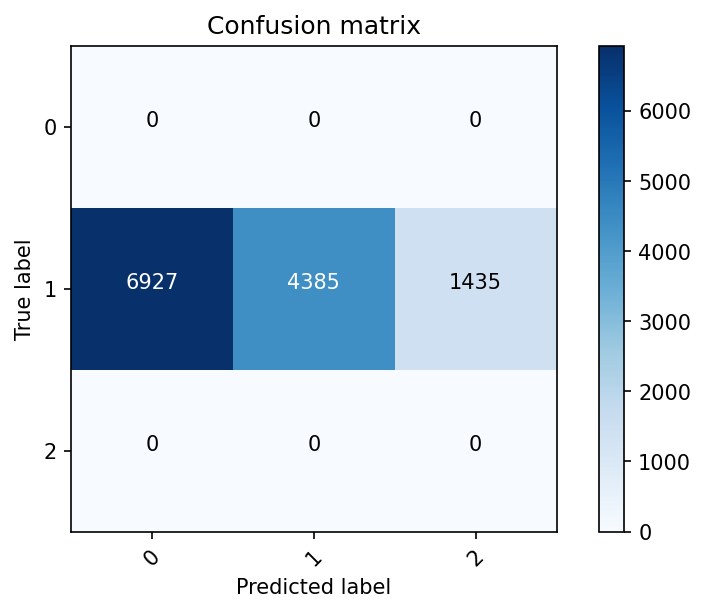

In [22]:
print_score(cart_clf, X_train_sc, y_train, X_test_sc, y_test, train = False)

#### Model 2: Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_clf = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_features = 'sqrt',random_state = 0,max_depth=7,min_samples_leaf=2)
rf_clf.fit(X_train_sc, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       random_state=0)

In [25]:
#print_score(rf_clf, X_train_sc, y_train, X_test_sc, y_test, train = True)

Test Result:

accuracy score: 0.4966

Classification Report: 
               precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         0
           1    1.00000   0.49659   0.66363     12747
           2    0.00000   0.00000   0.00000         0

    accuracy                        0.49659     12747
   macro avg    0.33333   0.16553   0.22121     12747
weighted avg    1.00000   0.49659   0.66363     12747


Confusion matrix, without normalization
[[   0    0    0]
 [4480 6330 1937]
 [   0    0    0]]


/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

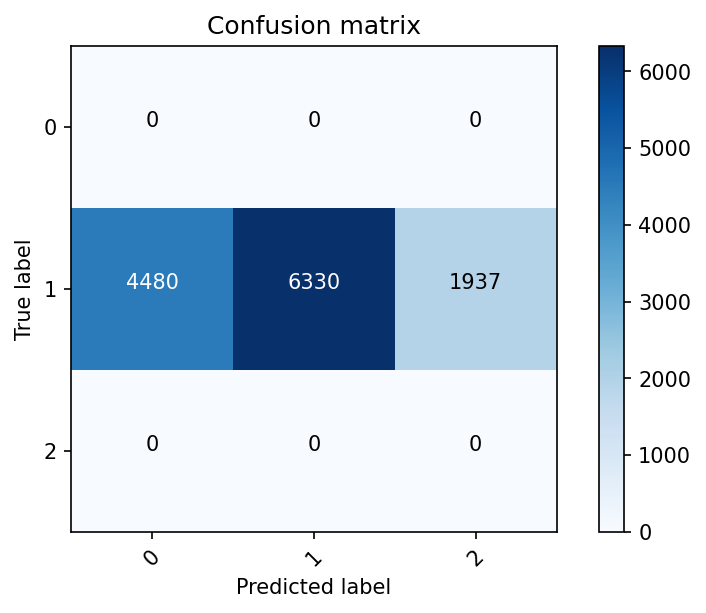

In [26]:
print_score(rf_clf, X_train_sc, y_train, X_test_sc, y_test, train = False)                                     

#### Model 3: Linear SVM

In [27]:
from sklearn import svm

In [28]:
svm_clf = svm.SVC(kernel='linear',decision_function_shape = 'ovr',gamma='auto',random_state=0, C = 2.0,verbose=True)
svm_clf.fit(X_train_mm_sc, y_train)

[LibSVM]...................................................................................................................................
*.
*......
*..
*.
*.
*.
*
optimization finished, #iter = 140618
obj = -445496.365959, rho = 7.882338
nSV = 223938, nBSV = 223911
........................................................................................................
*.....
*.
*.
*
optimization finished, #iter = 110081
obj = -356311.605128, rho = 0.627255
nSV = 178318, nBSV = 178292
..........................................................................................................
*.
*........
*......
*.
*
optimization finished, #iter = 121335
obj = -362732.639465, rho = -9.209359
nSV = 184365, nBSV = 184339
Total nSV = 369662


SVC(C=2.0, gamma='auto', kernel='linear', random_state=0, verbose=True)

Test Result:

accuracy score: 0.2425



/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Classification Report: 
               precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         0
           1    1.00000   0.24249   0.39033     12747
           2    0.00000   0.00000   0.00000         0

    accuracy                        0.24249     12747
   macro avg    0.33333   0.08083   0.13011     12747
weighted avg    1.00000   0.24249   0.39033     12747


Confusion matrix, without normalization
[[   0    0    0]
 [8125 3091 1531]
 [   0    0    0]]


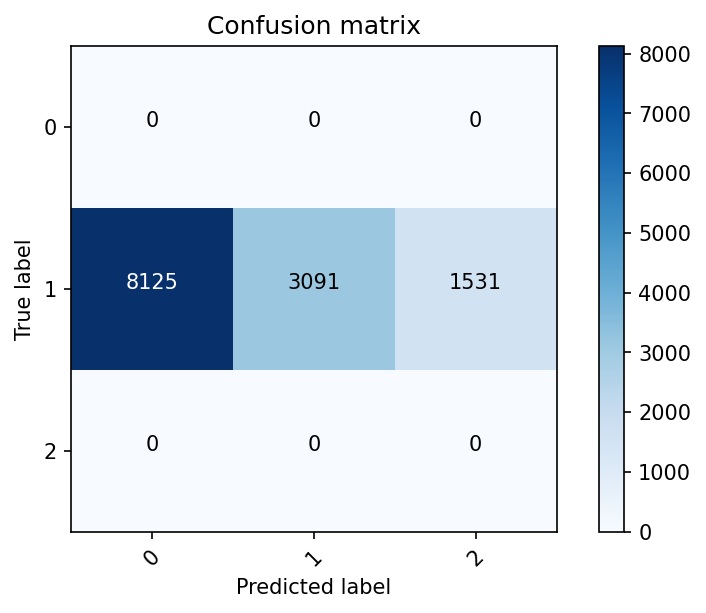

In [29]:
print_score(svm_clf, X_train_mm_sc, y_train, X_test_mm_sc, y_test, train = False)

END

**Signed By:**

Muiz Alvi <br><br>
Adil Jowad Qureshi